In [1]:
import pandas as pd
dataset= pd.read_csv(r"C:\Users\rafi\Desktop\master pro\EB7_by_LA1.csv", encoding= 'unicode_escape', delimiter= ',')
print(dataset)

      AverageFloorArea  Year/Quarter  Property Type  \
0                 14.0             1              5   
1                 14.0             4              1   
2                 19.0             1              4   
3                 20.0             1              1   
4                 20.0             1              2   
...                ...           ...            ...   
1621             156.0             3              3   
1622             156.0             3              4   
1623             156.0             4              4   
1624             157.0             2              3   
1625             157.0             4              3   

      EnergyUseAveragePerDwelling  
0                           356.0  
1                           468.0  
2                           375.0  
3                           464.5  
4                           366.0  
...                           ...  
1621                        253.0  
1622                        289.0  
1623           

In [2]:
dataset.dtypes

AverageFloorArea               float64
Year/Quarter                     int64
Property Type                    int64
EnergyUseAveragePerDwelling    float64
dtype: object

In [3]:
dataset

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling
0,14.0,1,5,356.0
1,14.0,4,1,468.0
2,19.0,1,4,375.0
3,20.0,1,1,464.5
4,20.0,1,2,366.0
...,...,...,...,...
1621,156.0,3,3,253.0
1622,156.0,3,4,289.0
1623,156.0,4,4,220.0
1624,157.0,2,3,316.0


In [4]:
dataset['EnergyUseAveragePerDwelling'] = dataset['EnergyUseAveragePerDwelling'].astype(int)
dataset['AverageFloorArea'] = dataset['AverageFloorArea'].astype(int)
dataset

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling
0,14,1,5,356
1,14,4,1,468
2,19,1,4,375
3,20,1,1,464
4,20,1,2,366
...,...,...,...,...
1621,156,3,3,253
1622,156,3,4,289
1623,156,4,4,220
1624,157,2,3,316


In [5]:
from sklearn.model_selection import train_test_split
X=dataset.drop('EnergyUseAveragePerDwelling',axis=1)
Y=dataset['EnergyUseAveragePerDwelling']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 0)
X_train


,AverageFloorArea,Year/Quarter,Property Type
56,32,3,1
1127,102,4,1
411,57,1,4
548,65,3,2
501,62,3,5
...,...,...,...
763,78,3,4
835,82,3,3
1216,109,3,1
559,66,1,5


## Naive Bias

In [6]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train.values,Y_train.values)

GaussianNB()

In [7]:
prediction = NB_model.predict([[80,2,2]])
print("Prediction: {}".format(prediction))

Prediction: [369]


In [8]:
from sklearn.metrics import r2_score
r2_score(Y_test, NB_model.predict(X_test.values))

-2.2701311548402807

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, NB_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, NB_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 6502.741803278688
mean absolute error: 63.4344262295082


Text(0.5, 1.0, 'Actual vs predicted')

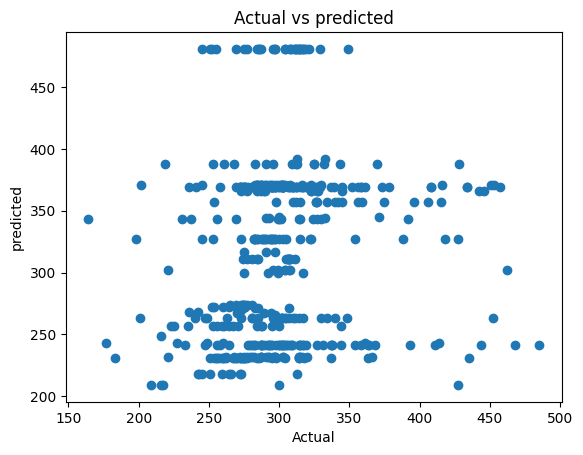

In [10]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, NB_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [11]:
y_prd=NB_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
443,287,232,55
319,317,369,-52
703,295,257,38
526,320,369,-49
76,435,231,204
1542,231,343,-112
1261,249,263,-14
532,285,311,-26
1294,293,371,-78
517,296,388,-92


## Linear regression

In [12]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train.values,Y_train.values)

LinearRegression()

In [13]:
prediction = lr_model.predict([[80,2,2]])
print("Prediction: {}".format(prediction))

Prediction: [307.26710557]


In [14]:
from sklearn.metrics import r2_score
r2_score(Y_test, lr_model.predict(X_test.values))

0.1460930346459155

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, lr_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, lr_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 1698.0164576885475
mean absolute error: 26.87240218134793


Text(0.5, 1.0, 'Actual vs predicted')

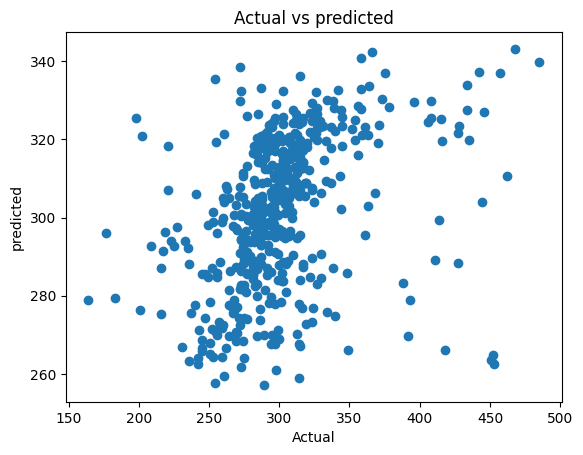

In [16]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, lr_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [17]:
y_prd=lr_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
443,287,320.790563,-33.790563
319,317,317.297703,-0.297703
703,295,297.760815,-2.760815
526,320,319.160513,0.839487
76,435,319.936168,115.063832
1542,231,266.848775,-35.848775
1261,249,284.807303,-35.807303
532,285,314.255850,-29.255850
1294,293,278.054345,14.945655
517,296,305.740434,-9.740434


## Random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)
prediction = RF.predict([[80,1,2]])
print("Prediction: {}".format(prediction))

Prediction: [317.625]


In [36]:
from sklearn.metrics import r2_score
r2_score(Y_test, RF.predict(X_test.values))

0.13265610277105222

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, RF.predict(X_test.values))
mae= mean_absolute_error(Y_test, RF.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 1724.7361501024589
mean absolute error: 26.048381147540987


Text(0.5, 1.0, 'Actual vs predicted')

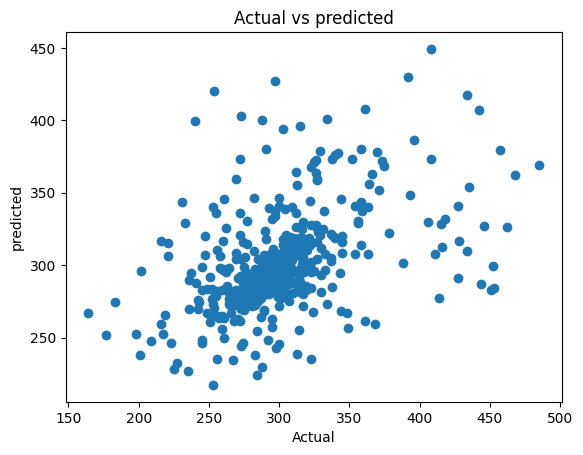

In [38]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, RF.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [39]:
y_prd=RF.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
443,287,291.330,-4.330
319,317,303.215,13.785
703,295,257.125,37.875
526,320,311.885,8.115
76,435,354.295,80.705
1542,231,343.685,-112.685
1261,249,283.375,-34.375
532,285,290.840,-5.840
1294,293,283.870,9.130
517,296,297.020,-1.020


## KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train.values,Y_train.values)
prediction = knn.predict([[80,2,2]])
print("Prediction: {}".format(prediction))

Prediction: [297.06666667]


In [41]:
from sklearn.metrics import r2_score
r2_score(Y_test, knn.predict(X_test.values))

0.23775391952133618

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, knn.predict(X_test.values))
mae= mean_absolute_error(Y_test, knn.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 1515.7463775045537
mean absolute error: 25.44733606557377


Text(0.5, 1.0, 'Actual vs predicted')

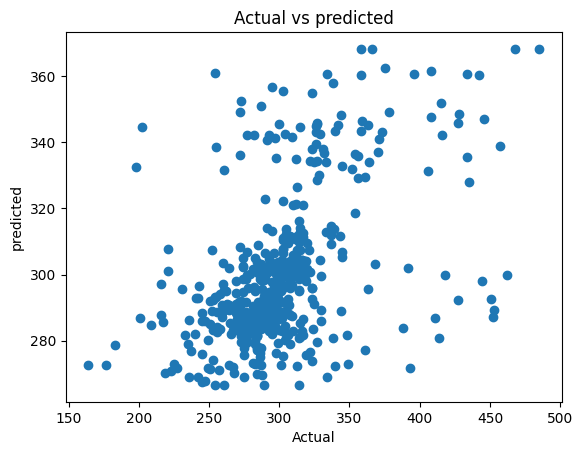

In [43]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, knn.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [44]:
y_prd=knn.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
443,287,300.633333,-13.633333
319,317,311.366667,5.633333
703,295,292.666667,2.333333
526,320,301.633333,18.366667
76,435,328.000000,107.000000
1542,231,295.633333,-64.633333
1261,249,280.133333,-31.133333
532,285,300.400000,-15.400000
1294,293,283.033333,9.966667
517,296,296.166667,-0.166667


## CNN

In [50]:
from keras.layers import Dense, Dropout,Activation, Conv1D,MaxPooling1D,Flatten
from keras.models import Sequential
model1=Sequential()
model1.add(Conv1D(64, kernel_size=1, activation='relu', name='Conv1D_1',input_shape=(X_train.shape[1],1)))
model1.add(Dropout(0.2))
model1.add(Conv1D(32, kernel_size=1, activation='relu', name='Conv1D_2'))
model1.add(Conv1D(16, kernel_size=1, activation='relu', name='Conv1D_3'))
model1.add(MaxPooling1D(pool_size=1,name="maxpooling_2"))
model1.add(Flatten())
model1.add(Dense(32, activation='linear',name='Dense_1'))
model1.add(Dense(units=1))
model1.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 3, 64)             128       
                                                                 
 dropout (Dropout)           (None, 3, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 3, 32)             2080      
                                                                 
 Conv1D_3 (Conv1D)           (None, 3, 16)             528       
                                                                 
 maxpooling_2 (MaxPooling1D)  (None, 3, 16)            0         
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)                1

In [51]:
model1.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
25/25 [==============================] - 2s 22ms/step - loss: 84785.1328 - mae: 287.2177 - val_loss: 74369.4844 - val_mae: 266.6172
Epoch 2/2000
25/25 [==============================] - 0s 6ms/step - loss: 46586.0586 - mae: 199.1837 - val_loss: 19183.2324 - val_mae: 110.0583
Epoch 3/2000
25/25 [==============================] - 0s 6ms/step - loss: 18533.7617 - mae: 110.5015 - val_loss: 16652.8398 - val_mae: 102.4022
Epoch 4/2000
25/25 [==============================] - 0s 6ms/step - loss: 16943.2305 - mae: 104.8102 - val_loss: 15376.2295 - val_mae: 98.6397
Epoch 5/2000
25/25 [==============================] - 0s 5ms/step - loss: 15962.6748 - mae: 102.4015 - val_loss: 14708.4385 - val_mae: 96.1883
Epoch 6/2000
25/25 [==============================] - 0s 6ms/step - loss: 15055.7227 - mae: 99.2262 - val_loss: 14096.1436 - val_mae: 93.6736
Epoch 7/2000
25/25 [==============================] - 0s 7ms/step - loss: 13672.5264 - mae: 93.8785 - val_loss: 12318.1064 - val_mae: 87.66

Epoch 59/2000
25/25 [==============================] - 0s 7ms/step - loss: 1752.8093 - mae: 27.0640 - val_loss: 2460.7600 - val_mae: 32.5280
Epoch 60/2000
25/25 [==============================] - 0s 6ms/step - loss: 1711.8909 - mae: 27.6022 - val_loss: 2490.4539 - val_mae: 32.1577
Epoch 61/2000
25/25 [==============================] - 0s 6ms/step - loss: 1767.9812 - mae: 27.7509 - val_loss: 2460.3306 - val_mae: 32.8774
Epoch 62/2000
25/25 [==============================] - 0s 7ms/step - loss: 1684.6372 - mae: 26.7187 - val_loss: 2448.2048 - val_mae: 32.3135
Epoch 63/2000
25/25 [==============================] - 0s 7ms/step - loss: 1724.8557 - mae: 27.7216 - val_loss: 2570.2490 - val_mae: 36.9774
Epoch 64/2000
25/25 [==============================] - 0s 8ms/step - loss: 1812.8521 - mae: 28.5385 - val_loss: 2483.5564 - val_mae: 31.9030
Epoch 65/2000
25/25 [==============================] - 0s 9ms/step - loss: 1832.9819 - mae: 28.1529 - val_loss: 2498.2053 - val_mae: 31.6434
Epoch 66/2000

Epoch 117/2000
25/25 [==============================] - 0s 8ms/step - loss: 1631.0934 - mae: 25.8613 - val_loss: 2485.1458 - val_mae: 34.9051
Epoch 118/2000
25/25 [==============================] - 0s 6ms/step - loss: 1616.6654 - mae: 25.6385 - val_loss: 2512.8521 - val_mae: 35.6351
Epoch 119/2000
25/25 [==============================] - 0s 6ms/step - loss: 1649.9446 - mae: 25.9698 - val_loss: 2436.5669 - val_mae: 32.4914
Epoch 120/2000
25/25 [==============================] - 0s 6ms/step - loss: 1662.5404 - mae: 26.3318 - val_loss: 2544.9407 - val_mae: 36.3380
Epoch 121/2000
25/25 [==============================] - 0s 6ms/step - loss: 1670.5839 - mae: 26.4560 - val_loss: 2449.1990 - val_mae: 31.5199
Epoch 122/2000
25/25 [==============================] - 0s 6ms/step - loss: 1709.9705 - mae: 26.2826 - val_loss: 2449.9229 - val_mae: 32.4433
Epoch 123/2000
25/25 [==============================] - 0s 6ms/step - loss: 1694.2896 - mae: 26.9145 - val_loss: 2453.0425 - val_mae: 31.4005
Epoch 

Epoch 175/2000
25/25 [==============================] - 0s 6ms/step - loss: 1639.9620 - mae: 25.5262 - val_loss: 2478.8787 - val_mae: 34.7266
Epoch 176/2000
25/25 [==============================] - 0s 5ms/step - loss: 1649.3334 - mae: 26.0051 - val_loss: 2534.3535 - val_mae: 36.0556
Epoch 177/2000
25/25 [==============================] - 0s 6ms/step - loss: 1629.4360 - mae: 25.8660 - val_loss: 2572.3362 - val_mae: 36.9583
Epoch 178/2000
25/25 [==============================] - 0s 6ms/step - loss: 1644.3269 - mae: 26.4573 - val_loss: 2524.0164 - val_mae: 35.9353
Epoch 179/2000
25/25 [==============================] - 0s 6ms/step - loss: 1628.1643 - mae: 25.9454 - val_loss: 2443.3660 - val_mae: 33.3752
Epoch 180/2000
25/25 [==============================] - 0s 6ms/step - loss: 1700.0039 - mae: 26.8060 - val_loss: 2451.1382 - val_mae: 31.2326
Epoch 181/2000
25/25 [==============================] - 0s 6ms/step - loss: 1620.5208 - mae: 25.3849 - val_loss: 2447.7275 - val_mae: 33.3986
Epoch 

Epoch 233/2000
25/25 [==============================] - 0s 8ms/step - loss: 1638.9357 - mae: 25.7773 - val_loss: 2439.9866 - val_mae: 33.4473
Epoch 234/2000
25/25 [==============================] - 0s 11ms/step - loss: 1613.3054 - mae: 25.7008 - val_loss: 2484.0923 - val_mae: 34.7154
Epoch 235/2000
25/25 [==============================] - 0s 9ms/step - loss: 1606.2919 - mae: 25.4401 - val_loss: 2425.2112 - val_mae: 31.5568
Epoch 236/2000
25/25 [==============================] - 0s 8ms/step - loss: 1608.9554 - mae: 25.2311 - val_loss: 2437.7637 - val_mae: 33.2777
Epoch 237/2000
25/25 [==============================] - 0s 9ms/step - loss: 1631.3711 - mae: 25.7557 - val_loss: 2463.3435 - val_mae: 34.1296
Epoch 238/2000
25/25 [==============================] - 0s 7ms/step - loss: 1651.8942 - mae: 26.4740 - val_loss: 2510.1228 - val_mae: 35.3821
Epoch 239/2000
25/25 [==============================] - 0s 8ms/step - loss: 1639.0089 - mae: 25.8064 - val_loss: 2462.2285 - val_mae: 34.0712
Epoch

Epoch 291/2000
25/25 [==============================] - 0s 6ms/step - loss: 1607.5176 - mae: 25.5100 - val_loss: 2451.1270 - val_mae: 33.8807
Epoch 292/2000
25/25 [==============================] - 0s 6ms/step - loss: 1629.6361 - mae: 25.5713 - val_loss: 2472.6553 - val_mae: 34.5782
Epoch 293/2000
25/25 [==============================] - 0s 6ms/step - loss: 1616.1753 - mae: 25.7567 - val_loss: 2455.2446 - val_mae: 33.9815
Epoch 294/2000
25/25 [==============================] - 0s 6ms/step - loss: 1616.4680 - mae: 25.3366 - val_loss: 2451.2502 - val_mae: 33.3512
Epoch 295/2000
25/25 [==============================] - 0s 6ms/step - loss: 1603.6923 - mae: 25.4442 - val_loss: 2430.1174 - val_mae: 32.9057
Epoch 296/2000
25/25 [==============================] - 0s 6ms/step - loss: 1613.5756 - mae: 25.7947 - val_loss: 2430.8083 - val_mae: 32.8336
Epoch 297/2000
25/25 [==============================] - 0s 7ms/step - loss: 1605.3663 - mae: 25.3537 - val_loss: 2486.4075 - val_mae: 35.0074
Epoch 

Epoch 349/2000
25/25 [==============================] - 0s 7ms/step - loss: 1668.2671 - mae: 26.0750 - val_loss: 2427.4961 - val_mae: 31.3736
Epoch 350/2000
25/25 [==============================] - 0s 7ms/step - loss: 1618.8372 - mae: 26.0560 - val_loss: 2419.7756 - val_mae: 31.9673
Epoch 351/2000
25/25 [==============================] - 0s 6ms/step - loss: 1641.1570 - mae: 25.6819 - val_loss: 2417.6562 - val_mae: 32.3230
Epoch 352/2000
25/25 [==============================] - 0s 7ms/step - loss: 1600.5393 - mae: 25.4979 - val_loss: 2486.7031 - val_mae: 35.1440
Epoch 353/2000
25/25 [==============================] - 0s 8ms/step - loss: 1604.9119 - mae: 25.3312 - val_loss: 2465.2546 - val_mae: 34.5352
Epoch 354/2000
25/25 [==============================] - 0s 6ms/step - loss: 1603.3723 - mae: 25.4310 - val_loss: 2523.7910 - val_mae: 35.8632
Epoch 355/2000
25/25 [==============================] - 0s 6ms/step - loss: 1629.5559 - mae: 25.6559 - val_loss: 2427.5671 - val_mae: 33.0053
Epoch 

Epoch 407/2000
25/25 [==============================] - 0s 6ms/step - loss: 1624.7743 - mae: 25.3168 - val_loss: 2476.1318 - val_mae: 34.7737
Epoch 408/2000
25/25 [==============================] - 0s 6ms/step - loss: 1603.0065 - mae: 25.4425 - val_loss: 2642.4946 - val_mae: 38.3885
Epoch 409/2000
25/25 [==============================] - 0s 5ms/step - loss: 1606.1691 - mae: 25.5854 - val_loss: 2597.1338 - val_mae: 37.2982
Epoch 410/2000
25/25 [==============================] - 0s 5ms/step - loss: 1630.0945 - mae: 25.5645 - val_loss: 2615.1709 - val_mae: 37.7471
Epoch 411/2000
25/25 [==============================] - 0s 6ms/step - loss: 1623.0626 - mae: 25.7402 - val_loss: 2517.0920 - val_mae: 35.7082
Epoch 412/2000
25/25 [==============================] - 0s 7ms/step - loss: 1594.0465 - mae: 25.4378 - val_loss: 2638.8210 - val_mae: 38.0283
Epoch 413/2000
25/25 [==============================] - 0s 6ms/step - loss: 1612.9393 - mae: 25.7002 - val_loss: 2579.1731 - val_mae: 37.2291
Epoch 

Epoch 522/2000
25/25 [==============================] - 0s 6ms/step - loss: 1653.7327 - mae: 26.2504 - val_loss: 2426.9465 - val_mae: 33.4581
Epoch 523/2000
25/25 [==============================] - 0s 6ms/step - loss: 1625.3893 - mae: 25.3966 - val_loss: 2443.6279 - val_mae: 33.9815
Epoch 524/2000
25/25 [==============================] - 0s 6ms/step - loss: 1627.2698 - mae: 25.6557 - val_loss: 2420.7461 - val_mae: 32.8862
Epoch 525/2000
25/25 [==============================] - 0s 6ms/step - loss: 1619.5686 - mae: 25.1720 - val_loss: 2453.4568 - val_mae: 34.5386
Epoch 526/2000
25/25 [==============================] - 0s 6ms/step - loss: 1615.0543 - mae: 25.6079 - val_loss: 2441.1455 - val_mae: 34.0224
Epoch 527/2000
25/25 [==============================] - 0s 8ms/step - loss: 1612.5702 - mae: 25.3521 - val_loss: 2417.2356 - val_mae: 32.8835
Epoch 528/2000
25/25 [==============================] - 0s 6ms/step - loss: 1621.4529 - mae: 25.5651 - val_loss: 2557.4141 - val_mae: 36.7704
Epoch 

Epoch 580/2000
25/25 [==============================] - 0s 7ms/step - loss: 1607.9758 - mae: 25.1004 - val_loss: 2468.8806 - val_mae: 34.6541
Epoch 581/2000
25/25 [==============================] - 0s 6ms/step - loss: 1607.9655 - mae: 25.5111 - val_loss: 2446.9021 - val_mae: 34.0583
Epoch 582/2000
25/25 [==============================] - 0s 7ms/step - loss: 1626.5309 - mae: 25.4272 - val_loss: 2533.1794 - val_mae: 36.3816
Epoch 583/2000
25/25 [==============================] - 0s 7ms/step - loss: 1621.0278 - mae: 25.6570 - val_loss: 2527.5940 - val_mae: 36.1341
Epoch 584/2000
25/25 [==============================] - 0s 6ms/step - loss: 1607.8311 - mae: 25.3239 - val_loss: 2427.9756 - val_mae: 33.3357
Epoch 585/2000
25/25 [==============================] - 0s 7ms/step - loss: 1622.7180 - mae: 25.3308 - val_loss: 2404.5571 - val_mae: 32.4316
Epoch 586/2000
25/25 [==============================] - 0s 7ms/step - loss: 1603.8264 - mae: 25.5279 - val_loss: 2424.4443 - val_mae: 33.5389
Epoch 

Epoch 638/2000
25/25 [==============================] - 0s 7ms/step - loss: 1606.6366 - mae: 25.3925 - val_loss: 2503.7974 - val_mae: 35.9409
Epoch 639/2000
25/25 [==============================] - 0s 6ms/step - loss: 1624.7253 - mae: 25.6343 - val_loss: 2463.6980 - val_mae: 34.8718
Epoch 640/2000
25/25 [==============================] - 0s 6ms/step - loss: 1603.6783 - mae: 25.5844 - val_loss: 2400.0464 - val_mae: 32.2937
Epoch 641/2000
25/25 [==============================] - 0s 6ms/step - loss: 1618.8850 - mae: 25.3549 - val_loss: 2482.6624 - val_mae: 35.3922
Epoch 642/2000
25/25 [==============================] - 0s 6ms/step - loss: 1593.1141 - mae: 25.6310 - val_loss: 2398.5391 - val_mae: 31.6831
Epoch 643/2000
25/25 [==============================] - 0s 6ms/step - loss: 1665.9072 - mae: 25.9584 - val_loss: 2404.4949 - val_mae: 31.2793
Epoch 644/2000
25/25 [==============================] - 0s 6ms/step - loss: 1617.0232 - mae: 25.6542 - val_loss: 2410.3579 - val_mae: 32.8798
Epoch 

Epoch 696/2000
25/25 [==============================] - 0s 8ms/step - loss: 1631.8860 - mae: 25.4416 - val_loss: 2408.0901 - val_mae: 32.9957
Epoch 697/2000
25/25 [==============================] - 0s 7ms/step - loss: 1624.3998 - mae: 25.5389 - val_loss: 2407.6914 - val_mae: 32.7273
Epoch 698/2000
25/25 [==============================] - 0s 8ms/step - loss: 1609.1207 - mae: 25.5928 - val_loss: 2411.3894 - val_mae: 32.9619
Epoch 699/2000
25/25 [==============================] - 0s 8ms/step - loss: 1617.3022 - mae: 25.1575 - val_loss: 2411.0618 - val_mae: 33.1414
Epoch 700/2000
25/25 [==============================] - 0s 8ms/step - loss: 1597.3419 - mae: 25.3083 - val_loss: 2396.3792 - val_mae: 31.5823
Epoch 701/2000
25/25 [==============================] - 0s 7ms/step - loss: 1636.2189 - mae: 25.6769 - val_loss: 2395.4773 - val_mae: 31.7399
Epoch 702/2000
25/25 [==============================] - 0s 7ms/step - loss: 1612.2559 - mae: 25.3882 - val_loss: 2397.8914 - val_mae: 31.9690
Epoch 

Epoch 754/2000
25/25 [==============================] - 0s 8ms/step - loss: 1615.6245 - mae: 25.2674 - val_loss: 2460.7478 - val_mae: 34.8914
Epoch 755/2000
25/25 [==============================] - 0s 6ms/step - loss: 1583.7494 - mae: 24.5597 - val_loss: 2502.4207 - val_mae: 35.8604
Epoch 756/2000
25/25 [==============================] - 0s 7ms/step - loss: 1608.2644 - mae: 25.3595 - val_loss: 2459.6414 - val_mae: 34.6144
Epoch 757/2000
25/25 [==============================] - 0s 7ms/step - loss: 1627.0798 - mae: 25.8489 - val_loss: 2439.3914 - val_mae: 34.3032
Epoch 758/2000
25/25 [==============================] - 0s 7ms/step - loss: 1604.5001 - mae: 25.5464 - val_loss: 2396.5515 - val_mae: 32.6633
Epoch 759/2000
25/25 [==============================] - 0s 8ms/step - loss: 1611.7650 - mae: 25.5687 - val_loss: 2393.0566 - val_mae: 31.9764
Epoch 760/2000
25/25 [==============================] - 0s 7ms/step - loss: 1602.8011 - mae: 25.4131 - val_loss: 2422.4385 - val_mae: 33.6187
Epoch 

Epoch 812/2000
25/25 [==============================] - 0s 8ms/step - loss: 1600.2584 - mae: 25.2611 - val_loss: 2454.5532 - val_mae: 34.8193
Epoch 813/2000
25/25 [==============================] - 0s 7ms/step - loss: 1612.0043 - mae: 25.3231 - val_loss: 2458.3860 - val_mae: 34.9337
Epoch 814/2000
25/25 [==============================] - 0s 8ms/step - loss: 1602.4587 - mae: 25.0854 - val_loss: 2486.5664 - val_mae: 35.6081
Epoch 815/2000
25/25 [==============================] - 0s 8ms/step - loss: 1575.7277 - mae: 24.4584 - val_loss: 2466.7563 - val_mae: 35.0629
Epoch 816/2000
25/25 [==============================] - 0s 6ms/step - loss: 1615.2094 - mae: 25.6963 - val_loss: 2387.4600 - val_mae: 32.2628
Epoch 817/2000
25/25 [==============================] - 0s 7ms/step - loss: 1591.8143 - mae: 24.9696 - val_loss: 2411.7141 - val_mae: 33.5954
Epoch 818/2000
25/25 [==============================] - 0s 8ms/step - loss: 1587.0406 - mae: 25.2653 - val_loss: 2432.4277 - val_mae: 34.0881
Epoch 

Epoch 870/2000
25/25 [==============================] - 0s 7ms/step - loss: 1592.3826 - mae: 25.0530 - val_loss: 2349.4543 - val_mae: 31.2165
Epoch 871/2000
25/25 [==============================] - 0s 7ms/step - loss: 1581.1410 - mae: 24.9300 - val_loss: 2361.0735 - val_mae: 32.4967
Epoch 872/2000
25/25 [==============================] - 0s 6ms/step - loss: 1596.2303 - mae: 25.0972 - val_loss: 2472.8674 - val_mae: 35.6486
Epoch 873/2000
25/25 [==============================] - 0s 6ms/step - loss: 1595.1185 - mae: 25.0992 - val_loss: 2379.0720 - val_mae: 32.8916
Epoch 874/2000
25/25 [==============================] - 0s 6ms/step - loss: 1607.7573 - mae: 25.4950 - val_loss: 2375.5869 - val_mae: 33.0073
Epoch 875/2000
25/25 [==============================] - 0s 6ms/step - loss: 1598.5308 - mae: 25.0129 - val_loss: 2395.6675 - val_mae: 33.3910
Epoch 876/2000
25/25 [==============================] - 0s 7ms/step - loss: 1571.1451 - mae: 24.7298 - val_loss: 2360.3247 - val_mae: 32.2095
Epoch 

Epoch 928/2000
25/25 [==============================] - 0s 7ms/step - loss: 1573.1827 - mae: 24.9059 - val_loss: 2413.1885 - val_mae: 34.7387
Epoch 929/2000
25/25 [==============================] - 0s 6ms/step - loss: 1571.2079 - mae: 24.7020 - val_loss: 2489.6956 - val_mae: 36.3109
Epoch 930/2000
25/25 [==============================] - 0s 6ms/step - loss: 1582.6082 - mae: 25.1414 - val_loss: 2367.1694 - val_mae: 33.5848
Epoch 931/2000
25/25 [==============================] - 0s 6ms/step - loss: 1580.7769 - mae: 24.6671 - val_loss: 2407.0444 - val_mae: 34.5084
Epoch 932/2000
25/25 [==============================] - 0s 7ms/step - loss: 1568.8065 - mae: 24.5617 - val_loss: 2365.6001 - val_mae: 33.5935
Epoch 933/2000
25/25 [==============================] - 0s 7ms/step - loss: 1599.1005 - mae: 24.6701 - val_loss: 2383.6389 - val_mae: 33.9908
Epoch 934/2000
25/25 [==============================] - 0s 7ms/step - loss: 1592.5901 - mae: 25.4162 - val_loss: 2392.1968 - val_mae: 34.2108
Epoch 

Epoch 986/2000
25/25 [==============================] - 0s 7ms/step - loss: 1546.9075 - mae: 24.6983 - val_loss: 2272.6899 - val_mae: 30.9082
Epoch 987/2000
25/25 [==============================] - 0s 7ms/step - loss: 1568.1343 - mae: 24.6497 - val_loss: 2302.8438 - val_mae: 32.1004
Epoch 988/2000
25/25 [==============================] - 0s 8ms/step - loss: 1557.0438 - mae: 24.2646 - val_loss: 2328.0127 - val_mae: 33.2198
Epoch 989/2000
25/25 [==============================] - 0s 6ms/step - loss: 1552.9824 - mae: 24.9198 - val_loss: 2347.4502 - val_mae: 33.2827
Epoch 990/2000
25/25 [==============================] - 0s 6ms/step - loss: 1549.9211 - mae: 24.3479 - val_loss: 2321.7190 - val_mae: 32.9171
Epoch 991/2000
25/25 [==============================] - 0s 6ms/step - loss: 1544.7211 - mae: 24.6381 - val_loss: 2281.7246 - val_mae: 31.6748
Epoch 992/2000
25/25 [==============================] - 0s 8ms/step - loss: 1541.6820 - mae: 24.2386 - val_loss: 2304.7913 - val_mae: 32.4704
Epoch 

25/25 [==============================] - 0s 7ms/step - loss: 1519.7028 - mae: 24.1099 - val_loss: 2196.5520 - val_mae: 29.4002
Epoch 1101/2000
25/25 [==============================] - 0s 7ms/step - loss: 1534.0756 - mae: 23.9699 - val_loss: 2209.1641 - val_mae: 30.1490
Epoch 1102/2000
25/25 [==============================] - 0s 6ms/step - loss: 1520.3275 - mae: 23.9395 - val_loss: 2201.0361 - val_mae: 29.4137
Epoch 1103/2000
25/25 [==============================] - 0s 6ms/step - loss: 1529.7521 - mae: 23.9336 - val_loss: 2244.9102 - val_mae: 31.5112
Epoch 1104/2000
25/25 [==============================] - 0s 7ms/step - loss: 1512.0056 - mae: 23.7353 - val_loss: 2229.0298 - val_mae: 31.0715
Epoch 1105/2000
25/25 [==============================] - 0s 6ms/step - loss: 1505.1136 - mae: 23.8167 - val_loss: 2284.5068 - val_mae: 32.2460
Epoch 1106/2000
25/25 [==============================] - 0s 6ms/step - loss: 1523.3566 - mae: 23.8757 - val_loss: 2305.5254 - val_mae: 33.1062
Epoch 1107/2000

25/25 [==============================] - 0s 6ms/step - loss: 1491.7283 - mae: 23.4609 - val_loss: 2228.7046 - val_mae: 30.9753
Epoch 1215/2000
25/25 [==============================] - 0s 5ms/step - loss: 1521.2178 - mae: 24.3618 - val_loss: 2198.7278 - val_mae: 29.7461
Epoch 1216/2000
25/25 [==============================] - 0s 6ms/step - loss: 1486.9717 - mae: 23.4539 - val_loss: 2305.2803 - val_mae: 32.6592
Epoch 1217/2000
25/25 [==============================] - 0s 5ms/step - loss: 1513.9127 - mae: 23.9848 - val_loss: 2201.4836 - val_mae: 30.1207
Epoch 1218/2000
25/25 [==============================] - 0s 5ms/step - loss: 1497.1156 - mae: 23.3965 - val_loss: 2221.1177 - val_mae: 30.5349
Epoch 1219/2000
25/25 [==============================] - 0s 5ms/step - loss: 1505.5007 - mae: 23.6670 - val_loss: 2249.6926 - val_mae: 31.4320
Epoch 1220/2000
25/25 [==============================] - 0s 6ms/step - loss: 1510.0725 - mae: 23.6642 - val_loss: 2198.7278 - val_mae: 30.0390
Epoch 1221/2000

25/25 [==============================] - 0s 9ms/step - loss: 1496.4293 - mae: 23.5842 - val_loss: 2249.2061 - val_mae: 30.9812
Epoch 1329/2000
25/25 [==============================] - 0s 14ms/step - loss: 1511.5861 - mae: 23.6676 - val_loss: 2310.9534 - val_mae: 32.5495
Epoch 1330/2000
25/25 [==============================] - 0s 11ms/step - loss: 1493.3751 - mae: 23.5591 - val_loss: 2275.3894 - val_mae: 31.6178
Epoch 1331/2000
25/25 [==============================] - 0s 10ms/step - loss: 1469.1393 - mae: 23.4744 - val_loss: 2207.6990 - val_mae: 29.6230
Epoch 1332/2000
25/25 [==============================] - 0s 8ms/step - loss: 1513.1689 - mae: 23.9141 - val_loss: 2191.1907 - val_mae: 29.3832
Epoch 1333/2000
25/25 [==============================] - 0s 12ms/step - loss: 1570.1279 - mae: 24.2097 - val_loss: 2231.0542 - val_mae: 30.8310
Epoch 1334/2000
25/25 [==============================] - 0s 12ms/step - loss: 1524.4468 - mae: 23.9803 - val_loss: 2202.6899 - val_mae: 29.9484
Epoch 1335

25/25 [==============================] - 0s 8ms/step - loss: 1478.1135 - mae: 23.2600 - val_loss: 2195.8398 - val_mae: 29.4523
Epoch 1443/2000
25/25 [==============================] - 0s 7ms/step - loss: 1510.9266 - mae: 23.7217 - val_loss: 2191.5981 - val_mae: 29.0901
Epoch 1444/2000
25/25 [==============================] - 0s 7ms/step - loss: 1446.6086 - mae: 23.3328 - val_loss: 2389.3208 - val_mae: 33.9381
Epoch 1445/2000
25/25 [==============================] - 0s 8ms/step - loss: 1507.3157 - mae: 23.6787 - val_loss: 2240.5869 - val_mae: 30.9782
Epoch 1446/2000
25/25 [==============================] - 0s 7ms/step - loss: 1495.3604 - mae: 23.5615 - val_loss: 2250.3120 - val_mae: 30.9932
Epoch 1447/2000
25/25 [==============================] - 0s 7ms/step - loss: 1493.7213 - mae: 23.2528 - val_loss: 2208.1682 - val_mae: 29.8922
Epoch 1448/2000
25/25 [==============================] - 0s 7ms/step - loss: 1483.4703 - mae: 23.3287 - val_loss: 2190.7300 - val_mae: 29.5827
Epoch 1449/2000

25/25 [==============================] - 0s 16ms/step - loss: 1462.3979 - mae: 23.4260 - val_loss: 2211.0938 - val_mae: 29.7391
Epoch 1557/2000
25/25 [==============================] - 0s 12ms/step - loss: 1494.4801 - mae: 23.6457 - val_loss: 2189.7036 - val_mae: 29.4675
Epoch 1558/2000
25/25 [==============================] - 0s 11ms/step - loss: 1490.8636 - mae: 23.7302 - val_loss: 2200.1807 - val_mae: 29.8170
Epoch 1559/2000
25/25 [==============================] - 0s 10ms/step - loss: 1501.5853 - mae: 23.4335 - val_loss: 2234.8022 - val_mae: 30.4666
Epoch 1560/2000
25/25 [==============================] - 0s 11ms/step - loss: 1491.4128 - mae: 23.5268 - val_loss: 2197.4924 - val_mae: 29.2846
Epoch 1561/2000
25/25 [==============================] - 0s 9ms/step - loss: 1522.8151 - mae: 23.7050 - val_loss: 2212.1252 - val_mae: 29.8104
Epoch 1562/2000
25/25 [==============================] - 0s 18ms/step - loss: 1472.9124 - mae: 23.1696 - val_loss: 2248.8074 - val_mae: 30.7316
Epoch 156

25/25 [==============================] - 0s 7ms/step - loss: 1549.0756 - mae: 23.9517 - val_loss: 2200.4775 - val_mae: 29.1599
Epoch 1671/2000
25/25 [==============================] - 0s 7ms/step - loss: 1518.8751 - mae: 24.0071 - val_loss: 2212.2944 - val_mae: 29.8965
Epoch 1672/2000
25/25 [==============================] - 0s 9ms/step - loss: 1511.8395 - mae: 23.7135 - val_loss: 2273.6309 - val_mae: 31.5719
Epoch 1673/2000
25/25 [==============================] - 0s 10ms/step - loss: 1492.8837 - mae: 24.1186 - val_loss: 2216.1733 - val_mae: 29.1310
Epoch 1674/2000
25/25 [==============================] - 0s 11ms/step - loss: 1510.9603 - mae: 24.0883 - val_loss: 2230.9084 - val_mae: 30.2731
Epoch 1675/2000
25/25 [==============================] - 0s 8ms/step - loss: 1498.5917 - mae: 23.3794 - val_loss: 2201.0503 - val_mae: 29.1374
Epoch 1676/2000
25/25 [==============================] - 0s 9ms/step - loss: 1513.4441 - mae: 23.5830 - val_loss: 2206.9114 - val_mae: 29.4353
Epoch 1677/20

25/25 [==============================] - 0s 11ms/step - loss: 1528.5596 - mae: 23.2502 - val_loss: 2249.9373 - val_mae: 30.9985
Epoch 1785/2000
25/25 [==============================] - 0s 13ms/step - loss: 1505.2001 - mae: 23.9913 - val_loss: 2249.4851 - val_mae: 30.9415
Epoch 1786/2000
25/25 [==============================] - 0s 14ms/step - loss: 1473.6232 - mae: 23.3293 - val_loss: 2304.3960 - val_mae: 32.1045
Epoch 1787/2000
25/25 [==============================] - 0s 10ms/step - loss: 1486.1602 - mae: 23.4496 - val_loss: 2276.4478 - val_mae: 31.5158
Epoch 1788/2000
25/25 [==============================] - 0s 16ms/step - loss: 1496.3921 - mae: 23.5460 - val_loss: 2222.4509 - val_mae: 30.1823
Epoch 1789/2000
25/25 [==============================] - 0s 17ms/step - loss: 1517.3771 - mae: 23.6160 - val_loss: 2196.8696 - val_mae: 29.2253
Epoch 1790/2000
25/25 [==============================] - 0s 18ms/step - loss: 1508.6698 - mae: 23.5149 - val_loss: 2242.9863 - val_mae: 30.5982
Epoch 17

25/25 [==============================] - 0s 11ms/step - loss: 1522.1799 - mae: 23.5529 - val_loss: 2202.9319 - val_mae: 29.3355
Epoch 1842/2000
25/25 [==============================] - 0s 11ms/step - loss: 1506.9020 - mae: 23.6583 - val_loss: 2219.1318 - val_mae: 30.0139
Epoch 1843/2000
25/25 [==============================] - 0s 9ms/step - loss: 1496.7285 - mae: 23.3163 - val_loss: 2201.0251 - val_mae: 29.4139
Epoch 1844/2000
25/25 [==============================] - 0s 8ms/step - loss: 1489.2665 - mae: 23.2156 - val_loss: 2241.1746 - val_mae: 30.7366
Epoch 1845/2000
25/25 [==============================] - 0s 9ms/step - loss: 1498.3070 - mae: 23.4067 - val_loss: 2240.3718 - val_mae: 30.7541
Epoch 1846/2000
25/25 [==============================] - 0s 9ms/step - loss: 1570.5371 - mae: 24.5796 - val_loss: 2239.1028 - val_mae: 30.5689
Epoch 1847/2000
25/25 [==============================] - 0s 8ms/step - loss: 1476.5804 - mae: 23.5120 - val_loss: 2238.2383 - val_mae: 30.5966
Epoch 1848/20

25/25 [==============================] - 0s 10ms/step - loss: 1485.6327 - mae: 23.5576 - val_loss: 2227.6301 - val_mae: 30.0933
Epoch 1956/2000
25/25 [==============================] - 0s 9ms/step - loss: 1487.6627 - mae: 23.4348 - val_loss: 2256.4941 - val_mae: 30.5825
Epoch 1957/2000
25/25 [==============================] - 0s 8ms/step - loss: 1524.9358 - mae: 24.0684 - val_loss: 2222.9038 - val_mae: 30.0153
Epoch 1958/2000
25/25 [==============================] - 0s 9ms/step - loss: 1465.5665 - mae: 23.0872 - val_loss: 2237.4456 - val_mae: 30.3550
Epoch 1959/2000
25/25 [==============================] - 0s 16ms/step - loss: 1489.8970 - mae: 23.2337 - val_loss: 2272.6555 - val_mae: 30.9992
Epoch 1960/2000
25/25 [==============================] - 0s 13ms/step - loss: 1473.2321 - mae: 23.3871 - val_loss: 2221.4900 - val_mae: 29.9227
Epoch 1961/2000
25/25 [==============================] - 0s 16ms/step - loss: 1499.6693 - mae: 23.4263 - val_loss: 2260.5886 - val_mae: 30.9440
Epoch 1962/

In [52]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model1.predict(X_test)) )

16/16 [==============================] - 1s 2ms/step


0.22393976171391428

In [53]:
prediction =np.squeeze(model1.predict([[80,2,2]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 691ms/step
Prediction: 289.22064208984375


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model1.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model1.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

16/16 [==============================] - 0s 2ms/step
mean squired error: 1543.2161936061036
mean absolute error: 24.579801090428088


16/16 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Actual vs predicted')

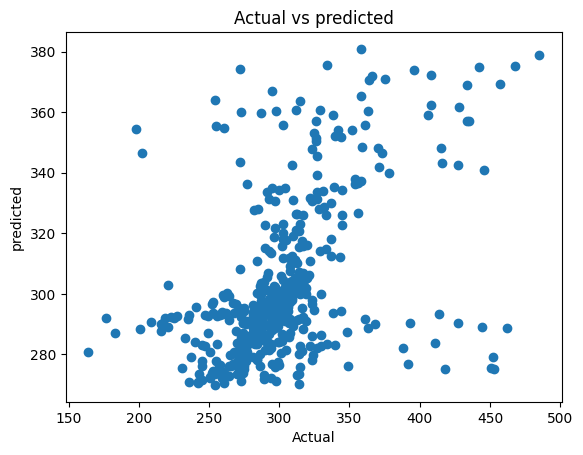

In [55]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model1.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [56]:
y_prd=np.squeeze(np.squeeze(model1.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

16/16 [==============================] - 0s 3ms/step


,Actual,predict,differences
443,287,303.475372,-16.475372
319,317,315.918976,1.081024
703,295,293.763519,1.236481
526,320,305.331573,14.668427
76,435,357.182800,77.817200
1542,231,275.703491,-44.703491
1261,249,287.115112,-38.115112
532,285,292.360626,-7.360626
1294,293,281.543060,11.456940
517,296,296.976654,-0.976654


## NN with dense layers

In [57]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model2=Sequential()
model2.add(Dense(128, input_dim=3, activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='linear'))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               512       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [58]:
model2.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
25/25 [==============================] - 3s 43ms/step - loss: 75707.4141 - mae: 269.5267 - val_loss: 59097.9531 - val_mae: 234.2166
Epoch 2/2000
25/25 [==============================] - 0s 13ms/step - loss: 40042.7773 - mae: 183.3765 - val_loss: 25827.7422 - val_mae: 134.1428
Epoch 3/2000
25/25 [==============================] - 0s 10ms/step - loss: 19583.2383 - mae: 113.8453 - val_loss: 17408.3691 - val_mae: 105.6671
Epoch 4/2000
25/25 [==============================] - 0s 7ms/step - loss: 17689.4941 - mae: 108.5616 - val_loss: 17404.5410 - val_mae: 105.2829
Epoch 5/2000
25/25 [==============================] - 0s 13ms/step - loss: 17421.8965 - mae: 107.4846 - val_loss: 17184.0371 - val_mae: 104.6097
Epoch 6/2000
25/25 [==============================] - 0s 14ms/step - loss: 17225.3027 - mae: 106.9206 - val_loss: 17017.3301 - val_mae: 104.0340
Epoch 7/2000
25/25 [==============================] - 0s 7ms/step - loss: 17057.9707 - mae: 106.1084 - val_loss: 16737.3496 - val_m

Epoch 116/2000
25/25 [==============================] - 0s 8ms/step - loss: 1689.5142 - mae: 26.2305 - val_loss: 2520.7815 - val_mae: 36.0170
Epoch 117/2000
25/25 [==============================] - 0s 9ms/step - loss: 1689.5646 - mae: 25.9884 - val_loss: 2370.6467 - val_mae: 30.5783
Epoch 118/2000
25/25 [==============================] - 0s 8ms/step - loss: 1626.3864 - mae: 25.3994 - val_loss: 2297.6523 - val_mae: 30.9110
Epoch 119/2000
25/25 [==============================] - 0s 10ms/step - loss: 1624.0446 - mae: 25.4852 - val_loss: 2289.9805 - val_mae: 30.5107
Epoch 120/2000
25/25 [==============================] - 0s 10ms/step - loss: 1631.5751 - mae: 25.1973 - val_loss: 2303.4336 - val_mae: 31.3133
Epoch 121/2000
25/25 [==============================] - 0s 8ms/step - loss: 1578.2059 - mae: 24.7791 - val_loss: 2370.2288 - val_mae: 30.1315
Epoch 122/2000
25/25 [==============================] - 0s 8ms/step - loss: 1593.6797 - mae: 24.7864 - val_loss: 2335.0454 - val_mae: 29.9026
Epoc

25/25 [==============================] - 0s 12ms/step - loss: 1510.5834 - mae: 23.9899 - val_loss: 2265.0112 - val_mae: 29.2720
Epoch 231/2000
25/25 [==============================] - 0s 8ms/step - loss: 1522.1821 - mae: 24.1354 - val_loss: 2225.0796 - val_mae: 29.5961
Epoch 232/2000
25/25 [==============================] - 0s 9ms/step - loss: 1504.0317 - mae: 23.8447 - val_loss: 2223.7998 - val_mae: 29.5464
Epoch 233/2000
25/25 [==============================] - 0s 7ms/step - loss: 1505.2950 - mae: 23.8763 - val_loss: 2232.2766 - val_mae: 30.4028
Epoch 234/2000
25/25 [==============================] - 0s 7ms/step - loss: 1526.1064 - mae: 24.4915 - val_loss: 2274.4834 - val_mae: 32.1811
Epoch 235/2000
25/25 [==============================] - 0s 7ms/step - loss: 1514.2693 - mae: 24.3490 - val_loss: 2329.5186 - val_mae: 29.6762
Epoch 236/2000
25/25 [==============================] - 0s 5ms/step - loss: 1518.5232 - mae: 24.0595 - val_loss: 2291.5366 - val_mae: 29.3911
Epoch 237/2000
25/25

Epoch 288/2000
25/25 [==============================] - 0s 7ms/step - loss: 1501.2543 - mae: 23.7805 - val_loss: 2333.5400 - val_mae: 29.7759
Epoch 289/2000
25/25 [==============================] - 0s 6ms/step - loss: 1524.5083 - mae: 24.4687 - val_loss: 2341.3240 - val_mae: 29.9821
Epoch 290/2000
25/25 [==============================] - 0s 10ms/step - loss: 1515.4260 - mae: 24.8853 - val_loss: 2209.8877 - val_mae: 30.2463
Epoch 291/2000
25/25 [==============================] - 0s 6ms/step - loss: 1551.8411 - mae: 24.9630 - val_loss: 2195.1038 - val_mae: 29.4572
Epoch 292/2000
25/25 [==============================] - 0s 9ms/step - loss: 1609.7367 - mae: 26.5454 - val_loss: 2537.1028 - val_mae: 33.1076
Epoch 293/2000
25/25 [==============================] - 0s 5ms/step - loss: 1552.8412 - mae: 25.1127 - val_loss: 2324.3481 - val_mae: 29.8888
Epoch 294/2000
25/25 [==============================] - 0s 9ms/step - loss: 1523.5889 - mae: 24.0968 - val_loss: 2252.3904 - val_mae: 29.0631
Epoch

Epoch 403/2000
25/25 [==============================] - 0s 7ms/step - loss: 1491.6799 - mae: 23.7443 - val_loss: 2270.6929 - val_mae: 29.3177
Epoch 404/2000
25/25 [==============================] - 0s 7ms/step - loss: 1496.6832 - mae: 24.0178 - val_loss: 2420.2168 - val_mae: 31.3999
Epoch 405/2000
25/25 [==============================] - 0s 7ms/step - loss: 1512.4425 - mae: 24.1522 - val_loss: 2197.2112 - val_mae: 29.4823
Epoch 406/2000
25/25 [==============================] - 0s 7ms/step - loss: 1476.4651 - mae: 23.4938 - val_loss: 2206.2300 - val_mae: 30.6278
Epoch 407/2000
25/25 [==============================] - 0s 10ms/step - loss: 1507.1388 - mae: 23.8814 - val_loss: 2200.7671 - val_mae: 29.0669
Epoch 408/2000
25/25 [==============================] - 0s 11ms/step - loss: 1490.7461 - mae: 23.6887 - val_loss: 2188.9465 - val_mae: 29.1289
Epoch 409/2000
25/25 [==============================] - 0s 12ms/step - loss: 1481.9445 - mae: 23.5289 - val_loss: 2251.3931 - val_mae: 29.0713
Epo

Epoch 518/2000
25/25 [==============================] - 0s 6ms/step - loss: 1450.6786 - mae: 23.2156 - val_loss: 2203.1760 - val_mae: 28.7447
Epoch 519/2000
25/25 [==============================] - 0s 11ms/step - loss: 1537.4618 - mae: 25.2953 - val_loss: 2238.3423 - val_mae: 31.6091
Epoch 520/2000
25/25 [==============================] - 0s 8ms/step - loss: 1465.4141 - mae: 23.2997 - val_loss: 2185.8455 - val_mae: 28.9789
Epoch 521/2000
25/25 [==============================] - 0s 9ms/step - loss: 1480.0448 - mae: 23.6296 - val_loss: 2189.4836 - val_mae: 28.7748
Epoch 522/2000
25/25 [==============================] - 0s 7ms/step - loss: 1476.0665 - mae: 23.4688 - val_loss: 2254.7791 - val_mae: 29.1786
Epoch 523/2000
25/25 [==============================] - 0s 9ms/step - loss: 1482.5330 - mae: 23.7176 - val_loss: 2230.0393 - val_mae: 28.7491
Epoch 524/2000
25/25 [==============================] - 0s 8ms/step - loss: 1482.3181 - mae: 24.0403 - val_loss: 2222.0847 - val_mae: 31.4453
Epoch

Epoch 633/2000
25/25 [==============================] - 0s 8ms/step - loss: 1489.6003 - mae: 24.1899 - val_loss: 2187.7290 - val_mae: 30.3062
Epoch 634/2000
25/25 [==============================] - 0s 10ms/step - loss: 1478.4823 - mae: 23.7898 - val_loss: 2181.4685 - val_mae: 29.5138
Epoch 635/2000
25/25 [==============================] - 0s 10ms/step - loss: 1483.1021 - mae: 23.4539 - val_loss: 2193.0862 - val_mae: 28.5942
Epoch 636/2000
25/25 [==============================] - 0s 9ms/step - loss: 1463.7128 - mae: 23.4142 - val_loss: 2201.8369 - val_mae: 28.7696
Epoch 637/2000
25/25 [==============================] - 0s 7ms/step - loss: 1441.6268 - mae: 22.9924 - val_loss: 2174.3813 - val_mae: 28.9957
Epoch 638/2000
25/25 [==============================] - 0s 7ms/step - loss: 1454.2416 - mae: 23.3796 - val_loss: 2279.8477 - val_mae: 29.6493
Epoch 639/2000
25/25 [==============================] - 0s 7ms/step - loss: 1473.7244 - mae: 23.6074 - val_loss: 2186.7649 - val_mae: 28.7881
Epoc

Epoch 748/2000
25/25 [==============================] - 0s 9ms/step - loss: 1442.2419 - mae: 23.4661 - val_loss: 2158.9050 - val_mae: 29.1655
Epoch 749/2000
25/25 [==============================] - 0s 6ms/step - loss: 1473.2260 - mae: 23.6753 - val_loss: 2162.5989 - val_mae: 29.3395
Epoch 750/2000
25/25 [==============================] - 0s 7ms/step - loss: 1454.9775 - mae: 23.4376 - val_loss: 2193.9023 - val_mae: 30.5152
Epoch 751/2000
25/25 [==============================] - 0s 10ms/step - loss: 1486.2402 - mae: 23.9773 - val_loss: 2168.7644 - val_mae: 29.7569
Epoch 752/2000
25/25 [==============================] - 0s 8ms/step - loss: 1508.2041 - mae: 24.4097 - val_loss: 2471.0061 - val_mae: 32.9600
Epoch 753/2000
25/25 [==============================] - 0s 9ms/step - loss: 1490.4692 - mae: 23.9200 - val_loss: 2212.0793 - val_mae: 28.7730
Epoch 754/2000
25/25 [==============================] - 0s 9ms/step - loss: 1476.6663 - mae: 23.7119 - val_loss: 2217.1533 - val_mae: 28.8362
Epoch

Epoch 863/2000
25/25 [==============================] - 0s 11ms/step - loss: 1441.4435 - mae: 23.4548 - val_loss: 2163.4375 - val_mae: 28.6164
Epoch 864/2000
25/25 [==============================] - 0s 9ms/step - loss: 1442.1683 - mae: 23.0206 - val_loss: 2398.0938 - val_mae: 35.1741
Epoch 865/2000
25/25 [==============================] - 0s 12ms/step - loss: 1544.1903 - mae: 24.9811 - val_loss: 2228.6025 - val_mae: 28.9294
Epoch 866/2000
25/25 [==============================] - 0s 8ms/step - loss: 1429.7361 - mae: 23.0750 - val_loss: 2266.7678 - val_mae: 29.4845
Epoch 867/2000
25/25 [==============================] - 0s 9ms/step - loss: 1467.1344 - mae: 23.3484 - val_loss: 2166.1423 - val_mae: 28.6710
Epoch 868/2000
25/25 [==============================] - 0s 10ms/step - loss: 1438.6827 - mae: 22.9775 - val_loss: 2164.6562 - val_mae: 28.8240
Epoch 869/2000
25/25 [==============================] - 0s 11ms/step - loss: 1440.5636 - mae: 22.9376 - val_loss: 2212.7112 - val_mae: 28.6122
Ep

25/25 [==============================] - 0s 8ms/step - loss: 1445.6624 - mae: 23.2680 - val_loss: 2169.0190 - val_mae: 29.8538
Epoch 978/2000
25/25 [==============================] - 0s 9ms/step - loss: 1614.4659 - mae: 27.2989 - val_loss: 2211.4714 - val_mae: 30.8137
Epoch 979/2000
25/25 [==============================] - 0s 8ms/step - loss: 1461.1996 - mae: 23.6068 - val_loss: 2198.7461 - val_mae: 28.4715
Epoch 980/2000
25/25 [==============================] - 0s 12ms/step - loss: 1460.6564 - mae: 23.7393 - val_loss: 2242.7393 - val_mae: 32.0860
Epoch 981/2000
25/25 [==============================] - 0s 8ms/step - loss: 1454.7155 - mae: 24.1475 - val_loss: 2157.2776 - val_mae: 28.6955
Epoch 982/2000
25/25 [==============================] - 0s 11ms/step - loss: 1417.8778 - mae: 22.6590 - val_loss: 2258.0505 - val_mae: 29.2814
Epoch 983/2000
25/25 [==============================] - 0s 10ms/step - loss: 1522.5336 - mae: 25.4549 - val_loss: 2155.4062 - val_mae: 28.9225
Epoch 984/2000
25/

25/25 [==============================] - 0s 13ms/step - loss: 1441.1495 - mae: 23.1941 - val_loss: 2207.1748 - val_mae: 28.6230
Epoch 1092/2000
25/25 [==============================] - 0s 7ms/step - loss: 1422.4178 - mae: 23.0357 - val_loss: 2204.7815 - val_mae: 28.3750
Epoch 1093/2000
25/25 [==============================] - 0s 14ms/step - loss: 1422.9927 - mae: 23.6907 - val_loss: 2348.8333 - val_mae: 30.8171
Epoch 1094/2000
25/25 [==============================] - 0s 9ms/step - loss: 1434.5037 - mae: 23.2094 - val_loss: 2173.4377 - val_mae: 29.0098
Epoch 1095/2000
25/25 [==============================] - 0s 10ms/step - loss: 1455.6180 - mae: 23.4611 - val_loss: 2167.5703 - val_mae: 28.2428
Epoch 1096/2000
25/25 [==============================] - 0s 7ms/step - loss: 1451.8826 - mae: 23.1822 - val_loss: 2335.7678 - val_mae: 30.7238
Epoch 1097/2000
25/25 [==============================] - 0s 12ms/step - loss: 1478.2172 - mae: 24.2693 - val_loss: 2243.0615 - val_mae: 31.6803
Epoch 1098/

25/25 [==============================] - 0s 7ms/step - loss: 1463.5769 - mae: 23.3662 - val_loss: 2157.1243 - val_mae: 29.1121
Epoch 1206/2000
25/25 [==============================] - 0s 11ms/step - loss: 1410.4492 - mae: 22.6311 - val_loss: 2185.2590 - val_mae: 28.4985
Epoch 1207/2000
25/25 [==============================] - 0s 13ms/step - loss: 1418.7462 - mae: 23.1792 - val_loss: 2271.6523 - val_mae: 32.9242
Epoch 1208/2000
25/25 [==============================] - 0s 7ms/step - loss: 1487.6478 - mae: 24.2378 - val_loss: 2200.2646 - val_mae: 28.5275
Epoch 1209/2000
25/25 [==============================] - 0s 9ms/step - loss: 1429.6584 - mae: 22.9511 - val_loss: 2270.2493 - val_mae: 29.3791
Epoch 1210/2000
25/25 [==============================] - 0s 11ms/step - loss: 1425.1613 - mae: 22.9088 - val_loss: 2207.4697 - val_mae: 28.5909
Epoch 1211/2000
25/25 [==============================] - 0s 8ms/step - loss: 1443.6893 - mae: 23.6364 - val_loss: 2166.5371 - val_mae: 29.3854
Epoch 1212/2

25/25 [==============================] - 0s 8ms/step - loss: 1411.4714 - mae: 22.9031 - val_loss: 2153.3384 - val_mae: 28.8023
Epoch 1320/2000
25/25 [==============================] - 0s 9ms/step - loss: 1414.5171 - mae: 22.8138 - val_loss: 2163.4875 - val_mae: 29.1349
Epoch 1321/2000
25/25 [==============================] - 0s 10ms/step - loss: 1434.1013 - mae: 23.4648 - val_loss: 2178.5251 - val_mae: 28.3732
Epoch 1322/2000
25/25 [==============================] - 0s 9ms/step - loss: 1395.7646 - mae: 22.5297 - val_loss: 2240.9639 - val_mae: 29.0060
Epoch 1323/2000
25/25 [==============================] - 0s 6ms/step - loss: 1409.1400 - mae: 22.7794 - val_loss: 2161.5852 - val_mae: 29.8426
Epoch 1324/2000
25/25 [==============================] - 0s 7ms/step - loss: 1438.1941 - mae: 23.6824 - val_loss: 2199.6326 - val_mae: 28.1814
Epoch 1325/2000
25/25 [==============================] - 0s 6ms/step - loss: 1448.6134 - mae: 23.8569 - val_loss: 2205.4358 - val_mae: 28.7622
Epoch 1326/200

25/25 [==============================] - 0s 9ms/step - loss: 1421.9177 - mae: 22.7452 - val_loss: 2198.8774 - val_mae: 30.8460
Epoch 1434/2000
25/25 [==============================] - 0s 9ms/step - loss: 1399.5717 - mae: 22.6740 - val_loss: 2190.0632 - val_mae: 28.4729
Epoch 1435/2000
25/25 [==============================] - 0s 6ms/step - loss: 1435.0048 - mae: 23.5221 - val_loss: 2176.9702 - val_mae: 28.7675
Epoch 1436/2000
25/25 [==============================] - 0s 6ms/step - loss: 1434.0647 - mae: 23.3295 - val_loss: 2168.1145 - val_mae: 29.6642
Epoch 1437/2000
25/25 [==============================] - 0s 6ms/step - loss: 1408.9731 - mae: 23.0496 - val_loss: 2165.1462 - val_mae: 29.3454
Epoch 1438/2000
25/25 [==============================] - 0s 8ms/step - loss: 1465.9259 - mae: 23.8307 - val_loss: 2147.2634 - val_mae: 28.7084
Epoch 1439/2000
25/25 [==============================] - 0s 7ms/step - loss: 1505.3224 - mae: 24.6686 - val_loss: 2222.5061 - val_mae: 28.9401
Epoch 1440/2000

25/25 [==============================] - 0s 7ms/step - loss: 1410.6919 - mae: 22.7948 - val_loss: 2206.3767 - val_mae: 28.5143
Epoch 1548/2000
25/25 [==============================] - 0s 8ms/step - loss: 1426.0081 - mae: 23.2295 - val_loss: 2169.2576 - val_mae: 29.7707
Epoch 1549/2000
25/25 [==============================] - 0s 7ms/step - loss: 1436.3666 - mae: 23.2663 - val_loss: 2166.3999 - val_mae: 28.3199
Epoch 1550/2000
25/25 [==============================] - 0s 10ms/step - loss: 1424.2408 - mae: 22.9080 - val_loss: 2180.9924 - val_mae: 28.4818
Epoch 1551/2000
25/25 [==============================] - 0s 7ms/step - loss: 1403.1825 - mae: 22.5287 - val_loss: 2175.0444 - val_mae: 29.2878
Epoch 1552/2000
25/25 [==============================] - 0s 10ms/step - loss: 1415.4309 - mae: 22.7178 - val_loss: 2145.0276 - val_mae: 28.5736
Epoch 1553/2000
25/25 [==============================] - 0s 7ms/step - loss: 1384.7101 - mae: 22.3371 - val_loss: 2163.3989 - val_mae: 29.1196
Epoch 1554/20

25/25 [==============================] - 0s 6ms/step - loss: 1500.5828 - mae: 25.4585 - val_loss: 2195.6887 - val_mae: 28.7174
Epoch 1662/2000
25/25 [==============================] - 0s 5ms/step - loss: 1418.8912 - mae: 22.9518 - val_loss: 2180.0269 - val_mae: 28.4536
Epoch 1663/2000
25/25 [==============================] - 0s 8ms/step - loss: 1382.6647 - mae: 22.2610 - val_loss: 2159.2390 - val_mae: 29.7579
Epoch 1664/2000
25/25 [==============================] - 0s 8ms/step - loss: 1402.7507 - mae: 22.4658 - val_loss: 2174.8501 - val_mae: 30.3519
Epoch 1665/2000
25/25 [==============================] - 0s 6ms/step - loss: 1407.4146 - mae: 22.6270 - val_loss: 2196.9590 - val_mae: 29.0229
Epoch 1666/2000
25/25 [==============================] - 0s 6ms/step - loss: 1375.8794 - mae: 22.0967 - val_loss: 2166.9695 - val_mae: 29.0986
Epoch 1667/2000
25/25 [==============================] - 0s 5ms/step - loss: 1382.1071 - mae: 22.7768 - val_loss: 2189.7092 - val_mae: 28.5456
Epoch 1668/2000

25/25 [==============================] - 0s 8ms/step - loss: 1423.8542 - mae: 23.6969 - val_loss: 2174.6426 - val_mae: 28.6810
Epoch 1776/2000
25/25 [==============================] - 0s 9ms/step - loss: 1383.8324 - mae: 22.4612 - val_loss: 2243.2185 - val_mae: 28.9682
Epoch 1777/2000
25/25 [==============================] - 0s 9ms/step - loss: 1381.6926 - mae: 22.4478 - val_loss: 2232.5090 - val_mae: 28.7358
Epoch 1778/2000
25/25 [==============================] - 0s 8ms/step - loss: 1395.2456 - mae: 22.5111 - val_loss: 2163.3091 - val_mae: 28.4553
Epoch 1779/2000
25/25 [==============================] - 0s 10ms/step - loss: 1385.9836 - mae: 22.5544 - val_loss: 2170.0693 - val_mae: 29.7575
Epoch 1780/2000
25/25 [==============================] - 0s 6ms/step - loss: 1412.0942 - mae: 22.9798 - val_loss: 2179.1001 - val_mae: 28.5339
Epoch 1781/2000
25/25 [==============================] - 0s 7ms/step - loss: 1392.7639 - mae: 22.5809 - val_loss: 2198.4575 - val_mae: 28.8998
Epoch 1782/200

25/25 [==============================] - 0s 13ms/step - loss: 1371.7781 - mae: 22.3305 - val_loss: 2180.9573 - val_mae: 29.3833
Epoch 1890/2000
25/25 [==============================] - 0s 14ms/step - loss: 1373.5280 - mae: 22.3279 - val_loss: 2286.2839 - val_mae: 29.3584
Epoch 1891/2000
25/25 [==============================] - 0s 13ms/step - loss: 1383.1174 - mae: 22.5613 - val_loss: 2186.3669 - val_mae: 28.7435
Epoch 1892/2000
25/25 [==============================] - 0s 20ms/step - loss: 1438.0669 - mae: 23.6242 - val_loss: 2207.5317 - val_mae: 31.1383
Epoch 1893/2000
25/25 [==============================] - 0s 12ms/step - loss: 1419.2999 - mae: 23.1606 - val_loss: 2199.3608 - val_mae: 28.8380
Epoch 1894/2000
25/25 [==============================] - 0s 16ms/step - loss: 1399.8334 - mae: 22.7584 - val_loss: 2169.3999 - val_mae: 28.8012
Epoch 1895/2000
25/25 [==============================] - 0s 9ms/step - loss: 1364.9561 - mae: 22.1534 - val_loss: 2212.2493 - val_mae: 31.1589
Epoch 189

In [59]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model2.predict(X_test)) )

16/16 [==============================] - 0s 2ms/step


0.2053504067457439

In [60]:
prediction =np.squeeze(model2.predict([[80,2,2]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 374ms/step
Prediction: 295.46527099609375


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model2.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model2.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

16/16 [==============================] - 0s 2ms/step
mean squired error: 1580.1816148457335
mean absolute error: 24.62714379732726


16/16 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

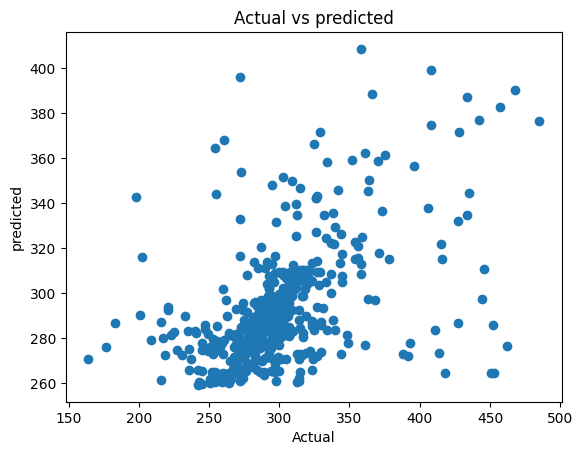

In [62]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model2.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [63]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

16/16 [==============================] - 0s 4ms/step


,Actual,predict,differences
443,287,296.304718,-9.304718
319,317,298.664520,18.335480
703,295,276.652985,18.347015
526,320,306.229828,13.770172
76,435,344.471405,90.528595
1542,231,272.682343,-41.682343
1261,249,281.688232,-32.688232
532,285,290.809509,-5.809509
1294,293,273.950012,19.049988
517,296,290.589783,5.410217


## RNN

In [64]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model3=Sequential()
model3.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model3.add(Dropout(0.2))
model3.add(LSTM(units=64, activation='relu', return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(units=32, activation='relu', return_sequences=True))
model3.add(Dropout(0.4))
model3.add(LSTM(units=64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=1))
model3.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 dropout_1 (Dropout)         (None, 3, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 64)             49408     
                                                                 
 dropout_2 (Dropout)         (None, 3, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 3, 32)             12416     
                                                                 
 dropout_3 (Dropout)         (None, 3, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [65]:
model3.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
25/25 [==============================] - 33s 189ms/step - loss: 86492.2344 - mae: 289.5708 - val_loss: 45396.6680 - val_mae: 195.0319
Epoch 2/2000
25/25 [==============================] - 1s 28ms/step - loss: 32071.7441 - mae: 147.0274 - val_loss: 11611.1523 - val_mae: 81.6264
Epoch 3/2000
25/25 [==============================] - 1s 25ms/step - loss: 17332.8262 - mae: 107.4766 - val_loss: 4639.0732 - val_mae: 53.5560
Epoch 4/2000
25/25 [==============================] - 1s 29ms/step - loss: 11447.1973 - mae: 84.8141 - val_loss: 3512.8899 - val_mae: 44.9724
Epoch 5/2000
25/25 [==============================] - 1s 34ms/step - loss: 10129.4814 - mae: 78.7653 - val_loss: 2656.4141 - val_mae: 35.6092
Epoch 6/2000
25/25 [==============================] - 1s 29ms/step - loss: 9039.5947 - mae: 75.2077 - val_loss: 3184.7727 - val_mae: 40.8949
Epoch 7/2000
25/25 [==============================] - 1s 27ms/step - loss: 8823.8760 - mae: 74.6673 - val_loss: 5550.1577 - val_mae: 62.7588


Epoch 116/2000
25/25 [==============================] - 1s 25ms/step - loss: 3868.5068 - mae: 48.8719 - val_loss: 2277.4861 - val_mae: 30.5365
Epoch 117/2000
25/25 [==============================] - 1s 22ms/step - loss: 3483.1941 - mae: 45.3917 - val_loss: 2371.4780 - val_mae: 31.2081
Epoch 118/2000
25/25 [==============================] - 1s 24ms/step - loss: 3766.7141 - mae: 46.6314 - val_loss: 2336.2344 - val_mae: 31.0439
Epoch 119/2000
25/25 [==============================] - 1s 23ms/step - loss: 3434.4280 - mae: 44.6697 - val_loss: 2703.3652 - val_mae: 35.8256
Epoch 120/2000
25/25 [==============================] - 1s 22ms/step - loss: 3280.8479 - mae: 44.2991 - val_loss: 2671.8892 - val_mae: 35.1472
Epoch 121/2000
25/25 [==============================] - 1s 24ms/step - loss: 3890.2109 - mae: 46.8286 - val_loss: 2267.2224 - val_mae: 31.0878
Epoch 122/2000
25/25 [==============================] - 1s 23ms/step - loss: 3526.0615 - mae: 46.5603 - val_loss: 2348.9626 - val_mae: 30.8167

25/25 [==============================] - 1s 24ms/step - loss: 3179.2634 - mae: 42.6945 - val_loss: 2207.7017 - val_mae: 28.9612
Epoch 231/2000
25/25 [==============================] - 1s 25ms/step - loss: 3218.8005 - mae: 43.6362 - val_loss: 2329.7478 - val_mae: 30.4739
Epoch 232/2000
25/25 [==============================] - 1s 28ms/step - loss: 3371.3323 - mae: 44.1940 - val_loss: 2204.2759 - val_mae: 28.9477
Epoch 233/2000
25/25 [==============================] - 1s 26ms/step - loss: 3444.7419 - mae: 44.2491 - val_loss: 2193.5505 - val_mae: 29.3565
Epoch 234/2000
25/25 [==============================] - 1s 24ms/step - loss: 3369.9902 - mae: 44.4342 - val_loss: 2270.1924 - val_mae: 30.2101
Epoch 235/2000
25/25 [==============================] - 0s 19ms/step - loss: 3262.4011 - mae: 43.8428 - val_loss: 2295.6892 - val_mae: 32.2961
Epoch 236/2000
25/25 [==============================] - 1s 23ms/step - loss: 3444.2566 - mae: 43.9673 - val_loss: 2205.8574 - val_mae: 29.3244
Epoch 237/2000

25/25 [==============================] - 1s 30ms/step - loss: 3206.0964 - mae: 43.4106 - val_loss: 2171.8564 - val_mae: 28.7480
Epoch 345/2000
25/25 [==============================] - 1s 29ms/step - loss: 3200.4187 - mae: 43.8158 - val_loss: 2416.4453 - val_mae: 32.0755
Epoch 346/2000
25/25 [==============================] - 1s 23ms/step - loss: 3666.3835 - mae: 44.3305 - val_loss: 2537.2705 - val_mae: 33.7873
Epoch 347/2000
25/25 [==============================] - 1s 25ms/step - loss: 3237.2129 - mae: 42.9363 - val_loss: 2631.6379 - val_mae: 35.2012
Epoch 348/2000
25/25 [==============================] - 1s 23ms/step - loss: 3445.0266 - mae: 43.9554 - val_loss: 2265.0425 - val_mae: 29.8544
Epoch 349/2000
25/25 [==============================] - 1s 25ms/step - loss: 3385.2825 - mae: 44.5153 - val_loss: 2362.6624 - val_mae: 31.2011
Epoch 350/2000
25/25 [==============================] - 1s 25ms/step - loss: 3353.8652 - mae: 43.7126 - val_loss: 2605.7554 - val_mae: 34.6754
Epoch 351/2000

25/25 [==============================] - 1s 20ms/step - loss: 3212.8193 - mae: 42.7410 - val_loss: 2103.6968 - val_mae: 28.3426
Epoch 459/2000
25/25 [==============================] - 0s 19ms/step - loss: 3088.1929 - mae: 42.8704 - val_loss: 2143.9336 - val_mae: 29.0462
Epoch 460/2000
25/25 [==============================] - 1s 21ms/step - loss: 3101.6709 - mae: 43.1709 - val_loss: 2213.7976 - val_mae: 29.0304
Epoch 461/2000
25/25 [==============================] - 0s 20ms/step - loss: 3016.1626 - mae: 42.0558 - val_loss: 2201.1643 - val_mae: 28.9401
Epoch 462/2000
25/25 [==============================] - 1s 20ms/step - loss: 3214.0566 - mae: 42.6112 - val_loss: 2159.0938 - val_mae: 28.8647
Epoch 463/2000
25/25 [==============================] - 1s 21ms/step - loss: 2947.7783 - mae: 42.0062 - val_loss: 2192.6987 - val_mae: 29.0309
Epoch 464/2000
25/25 [==============================] - 1s 22ms/step - loss: 3317.0073 - mae: 42.6240 - val_loss: 2242.0232 - val_mae: 29.5261
Epoch 465/2000

25/25 [==============================] - 0s 19ms/step - loss: 3106.7927 - mae: 42.4202 - val_loss: 2265.0708 - val_mae: 29.7390
Epoch 573/2000
25/25 [==============================] - 1s 22ms/step - loss: 3203.3618 - mae: 43.9308 - val_loss: 2269.4768 - val_mae: 29.7770
Epoch 574/2000
25/25 [==============================] - 0s 19ms/step - loss: 3109.8167 - mae: 42.9957 - val_loss: 2194.0623 - val_mae: 29.2648
Epoch 575/2000
25/25 [==============================] - 0s 20ms/step - loss: 3193.9473 - mae: 43.0284 - val_loss: 2132.4297 - val_mae: 28.2361
Epoch 576/2000
25/25 [==============================] - 1s 21ms/step - loss: 3080.4021 - mae: 40.8076 - val_loss: 2140.1455 - val_mae: 28.6612
Epoch 577/2000
25/25 [==============================] - 1s 28ms/step - loss: 3664.2463 - mae: 46.4776 - val_loss: 2180.9631 - val_mae: 29.5536
Epoch 578/2000
25/25 [==============================] - 1s 32ms/step - loss: 3498.9495 - mae: 45.0409 - val_loss: 2191.5615 - val_mae: 28.6548
Epoch 579/2000

25/25 [==============================] - 1s 23ms/step - loss: 3145.2839 - mae: 42.7907 - val_loss: 2085.1824 - val_mae: 27.9458
Epoch 687/2000
25/25 [==============================] - 1s 27ms/step - loss: 3261.2905 - mae: 43.6765 - val_loss: 2134.3889 - val_mae: 28.3123
Epoch 688/2000
25/25 [==============================] - 1s 24ms/step - loss: 3515.9700 - mae: 43.7854 - val_loss: 2259.8003 - val_mae: 29.6224
Epoch 689/2000
25/25 [==============================] - 1s 25ms/step - loss: 3548.1709 - mae: 44.8080 - val_loss: 2262.2639 - val_mae: 29.6669
Epoch 690/2000
25/25 [==============================] - 1s 26ms/step - loss: 3194.2595 - mae: 43.1983 - val_loss: 2449.6074 - val_mae: 32.2054
Epoch 691/2000
25/25 [==============================] - 1s 25ms/step - loss: 3162.0845 - mae: 43.6236 - val_loss: 2370.8191 - val_mae: 31.0001
Epoch 692/2000
25/25 [==============================] - 1s 24ms/step - loss: 3177.8247 - mae: 42.8690 - val_loss: 2240.6248 - val_mae: 29.5224
Epoch 693/2000

25/25 [==============================] - 0s 20ms/step - loss: 3028.0593 - mae: 42.4410 - val_loss: 2156.9719 - val_mae: 29.0076
Epoch 801/2000
25/25 [==============================] - 0s 19ms/step - loss: 2931.6702 - mae: 41.5228 - val_loss: 2242.1267 - val_mae: 29.2648
Epoch 802/2000
25/25 [==============================] - 0s 19ms/step - loss: 3199.4043 - mae: 42.8633 - val_loss: 2225.5574 - val_mae: 29.0687
Epoch 803/2000
25/25 [==============================] - 0s 19ms/step - loss: 2958.3772 - mae: 40.8919 - val_loss: 2339.4204 - val_mae: 30.5060
Epoch 804/2000
25/25 [==============================] - 0s 17ms/step - loss: 3244.9023 - mae: 42.7631 - val_loss: 2178.1741 - val_mae: 29.0585
Epoch 805/2000
25/25 [==============================] - 0s 18ms/step - loss: 3211.6665 - mae: 42.7395 - val_loss: 2352.5623 - val_mae: 30.7064
Epoch 806/2000
25/25 [==============================] - 0s 17ms/step - loss: 3124.2788 - mae: 42.9288 - val_loss: 2286.9221 - val_mae: 29.6691
Epoch 807/2000

25/25 [==============================] - 1s 22ms/step - loss: 3278.8188 - mae: 44.1661 - val_loss: 2194.2827 - val_mae: 28.6195
Epoch 915/2000
25/25 [==============================] - 0s 19ms/step - loss: 2973.1868 - mae: 41.8258 - val_loss: 2202.1394 - val_mae: 29.0150
Epoch 916/2000
25/25 [==============================] - 0s 19ms/step - loss: 3330.6516 - mae: 44.1866 - val_loss: 2196.7524 - val_mae: 28.3890
Epoch 917/2000
25/25 [==============================] - 1s 21ms/step - loss: 3015.1753 - mae: 41.9396 - val_loss: 2166.0127 - val_mae: 29.1113
Epoch 918/2000
25/25 [==============================] - 0s 20ms/step - loss: 3034.5190 - mae: 41.6836 - val_loss: 2206.2617 - val_mae: 29.3173
Epoch 919/2000
25/25 [==============================] - 1s 21ms/step - loss: 3155.6965 - mae: 43.0701 - val_loss: 2307.0957 - val_mae: 30.1937
Epoch 920/2000
25/25 [==============================] - 0s 18ms/step - loss: 3141.9482 - mae: 43.0969 - val_loss: 2446.8157 - val_mae: 32.4175
Epoch 921/2000

25/25 [==============================] - 1s 22ms/step - loss: 3145.4783 - mae: 43.5030 - val_loss: 2200.4192 - val_mae: 29.2525
Epoch 1029/2000
25/25 [==============================] - 1s 21ms/step - loss: 2820.4761 - mae: 40.7863 - val_loss: 2149.4741 - val_mae: 28.1207
Epoch 1030/2000
25/25 [==============================] - 1s 25ms/step - loss: 3115.3359 - mae: 42.6819 - val_loss: 2121.0149 - val_mae: 28.1554
Epoch 1031/2000
25/25 [==============================] - 1s 25ms/step - loss: 3067.6243 - mae: 42.3556 - val_loss: 2193.7495 - val_mae: 28.8003
Epoch 1032/2000
25/25 [==============================] - 1s 21ms/step - loss: 2896.1274 - mae: 40.6545 - val_loss: 2141.1675 - val_mae: 27.9778
Epoch 1033/2000
25/25 [==============================] - 1s 21ms/step - loss: 3079.8386 - mae: 40.9895 - val_loss: 2139.2510 - val_mae: 28.3042
Epoch 1034/2000
25/25 [==============================] - 1s 25ms/step - loss: 3177.1604 - mae: 43.1371 - val_loss: 2150.1052 - val_mae: 28.4697
Epoch 10

25/25 [==============================] - 1s 24ms/step - loss: 2592.0837 - mae: 39.4789 - val_loss: 2179.6284 - val_mae: 28.8414
Epoch 1086/2000
25/25 [==============================] - 1s 24ms/step - loss: 2932.8672 - mae: 41.6589 - val_loss: 2189.2031 - val_mae: 28.3937
Epoch 1087/2000
25/25 [==============================] - 1s 31ms/step - loss: 2894.0791 - mae: 40.1368 - val_loss: 2237.3040 - val_mae: 28.3047
Epoch 1088/2000
25/25 [==============================] - 1s 22ms/step - loss: 2975.4653 - mae: 41.3451 - val_loss: 2202.6462 - val_mae: 28.6397
Epoch 1089/2000
25/25 [==============================] - 0s 18ms/step - loss: 3040.5132 - mae: 42.3850 - val_loss: 2220.5527 - val_mae: 29.0930
Epoch 1090/2000
25/25 [==============================] - 0s 19ms/step - loss: 3086.8345 - mae: 42.3976 - val_loss: 2216.7556 - val_mae: 28.5092
Epoch 1091/2000
25/25 [==============================] - 0s 19ms/step - loss: 2844.1147 - mae: 40.2952 - val_loss: 2150.7693 - val_mae: 27.9287
Epoch 10

25/25 [==============================] - 0s 17ms/step - loss: 3069.6316 - mae: 41.9526 - val_loss: 2239.1111 - val_mae: 28.7344
Epoch 1143/2000
25/25 [==============================] - 0s 20ms/step - loss: 3175.9026 - mae: 42.5826 - val_loss: 2354.5767 - val_mae: 30.7512
Epoch 1144/2000
25/25 [==============================] - 0s 17ms/step - loss: 3246.6155 - mae: 43.4665 - val_loss: 2219.4358 - val_mae: 28.8893
Epoch 1145/2000
25/25 [==============================] - 0s 19ms/step - loss: 3150.7317 - mae: 42.7566 - val_loss: 2264.0579 - val_mae: 28.7553
Epoch 1146/2000
25/25 [==============================] - 0s 20ms/step - loss: 2955.4998 - mae: 42.0842 - val_loss: 2175.5820 - val_mae: 29.3478
Epoch 1147/2000
25/25 [==============================] - 1s 21ms/step - loss: 3010.8938 - mae: 41.5541 - val_loss: 2285.3816 - val_mae: 29.0024
Epoch 1148/2000
25/25 [==============================] - 0s 19ms/step - loss: 3064.3740 - mae: 41.7374 - val_loss: 2161.4534 - val_mae: 28.5173
Epoch 11

25/25 [==============================] - 1s 21ms/step - loss: 3083.5955 - mae: 42.3897 - val_loss: 2215.2964 - val_mae: 28.4967
Epoch 1200/2000
25/25 [==============================] - 0s 18ms/step - loss: 2873.5869 - mae: 40.7308 - val_loss: 2335.6304 - val_mae: 31.2168
Epoch 1201/2000
25/25 [==============================] - 0s 18ms/step - loss: 2844.5054 - mae: 41.1407 - val_loss: 2229.3330 - val_mae: 29.1404
Epoch 1202/2000
25/25 [==============================] - 1s 21ms/step - loss: 3021.6182 - mae: 41.8989 - val_loss: 2217.8655 - val_mae: 28.8428
Epoch 1203/2000
25/25 [==============================] - 0s 19ms/step - loss: 3023.9375 - mae: 42.0972 - val_loss: 2418.9641 - val_mae: 31.5976
Epoch 1204/2000
25/25 [==============================] - 0s 17ms/step - loss: 2914.4617 - mae: 41.6017 - val_loss: 2300.5649 - val_mae: 29.9414
Epoch 1205/2000
25/25 [==============================] - 1s 21ms/step - loss: 3134.8110 - mae: 41.8888 - val_loss: 2402.2620 - val_mae: 31.9206
Epoch 12

25/25 [==============================] - 0s 17ms/step - loss: 2867.1216 - mae: 41.0288 - val_loss: 2469.2002 - val_mae: 31.3160
Epoch 1257/2000
25/25 [==============================] - 1s 20ms/step - loss: 2994.3276 - mae: 42.3041 - val_loss: 2312.2668 - val_mae: 29.8745
Epoch 1258/2000
25/25 [==============================] - 0s 20ms/step - loss: 3011.9866 - mae: 42.3812 - val_loss: 2382.3591 - val_mae: 29.8253
Epoch 1259/2000
25/25 [==============================] - 0s 19ms/step - loss: 2745.9268 - mae: 39.9894 - val_loss: 2221.6257 - val_mae: 28.7967
Epoch 1260/2000
25/25 [==============================] - 1s 22ms/step - loss: 2900.8936 - mae: 41.8164 - val_loss: 2339.5715 - val_mae: 29.5418
Epoch 1261/2000
25/25 [==============================] - 0s 20ms/step - loss: 3071.0815 - mae: 42.1910 - val_loss: 2319.1138 - val_mae: 28.7032
Epoch 1262/2000
25/25 [==============================] - 0s 19ms/step - loss: 2964.7986 - mae: 41.9470 - val_loss: 2328.9558 - val_mae: 29.6574
Epoch 12

25/25 [==============================] - 1s 21ms/step - loss: 3140.5720 - mae: 42.4795 - val_loss: 2420.0129 - val_mae: 31.4915
Epoch 1314/2000
25/25 [==============================] - 1s 21ms/step - loss: 2955.0596 - mae: 42.0705 - val_loss: 2258.5405 - val_mae: 29.0302
Epoch 1315/2000
25/25 [==============================] - 0s 20ms/step - loss: 3355.7905 - mae: 43.5285 - val_loss: 2452.3555 - val_mae: 31.5517
Epoch 1316/2000
25/25 [==============================] - 0s 17ms/step - loss: 3359.1284 - mae: 44.5634 - val_loss: 2407.5767 - val_mae: 31.6031
Epoch 1317/2000
25/25 [==============================] - 1s 22ms/step - loss: 2864.9868 - mae: 41.2763 - val_loss: 2211.1104 - val_mae: 28.8713
Epoch 1318/2000
25/25 [==============================] - 0s 17ms/step - loss: 2961.2739 - mae: 41.3460 - val_loss: 2218.7148 - val_mae: 28.4848
Epoch 1319/2000
25/25 [==============================] - 1s 24ms/step - loss: 2900.4136 - mae: 41.2544 - val_loss: 2298.7053 - val_mae: 29.5625
Epoch 13

25/25 [==============================] - 1s 27ms/step - loss: 2876.3291 - mae: 40.6282 - val_loss: 2273.1077 - val_mae: 29.2653
Epoch 1371/2000
25/25 [==============================] - 1s 29ms/step - loss: 2764.3574 - mae: 40.2113 - val_loss: 2199.8298 - val_mae: 28.7850
Epoch 1372/2000
25/25 [==============================] - 1s 27ms/step - loss: 2853.3259 - mae: 41.0337 - val_loss: 2195.9836 - val_mae: 28.4532
Epoch 1373/2000
25/25 [==============================] - 1s 22ms/step - loss: 2929.9014 - mae: 41.6978 - val_loss: 2419.6721 - val_mae: 30.3892
Epoch 1374/2000
25/25 [==============================] - 1s 24ms/step - loss: 2769.4417 - mae: 40.4610 - val_loss: 2324.9917 - val_mae: 29.9111
Epoch 1375/2000
25/25 [==============================] - 1s 25ms/step - loss: 3192.9253 - mae: 43.2623 - val_loss: 2415.4307 - val_mae: 32.1755
Epoch 1376/2000
25/25 [==============================] - 1s 27ms/step - loss: 2918.3450 - mae: 40.4517 - val_loss: 2323.8652 - val_mae: 29.3740
Epoch 13

25/25 [==============================] - 1s 28ms/step - loss: 2830.3103 - mae: 40.4371 - val_loss: 2196.6875 - val_mae: 28.5824
Epoch 1428/2000
25/25 [==============================] - 1s 23ms/step - loss: 2893.3137 - mae: 41.5455 - val_loss: 2149.7271 - val_mae: 28.1711
Epoch 1429/2000
25/25 [==============================] - 1s 26ms/step - loss: 2877.7336 - mae: 40.3445 - val_loss: 2242.9751 - val_mae: 28.6182
Epoch 1430/2000
25/25 [==============================] - 1s 26ms/step - loss: 3186.0737 - mae: 42.8706 - val_loss: 2241.4351 - val_mae: 28.4040
Epoch 1431/2000
25/25 [==============================] - 1s 30ms/step - loss: 3010.7251 - mae: 41.7482 - val_loss: 2257.3096 - val_mae: 30.0814
Epoch 1432/2000
25/25 [==============================] - 1s 26ms/step - loss: 2896.8352 - mae: 41.8798 - val_loss: 2260.7371 - val_mae: 28.8389
Epoch 1433/2000
25/25 [==============================] - 1s 30ms/step - loss: 3053.2173 - mae: 42.6019 - val_loss: 2364.1936 - val_mae: 29.8995
Epoch 14

25/25 [==============================] - 1s 25ms/step - loss: 3010.8276 - mae: 41.2504 - val_loss: 2181.4219 - val_mae: 28.4855
Epoch 1485/2000
25/25 [==============================] - 1s 25ms/step - loss: 2973.5110 - mae: 42.5610 - val_loss: 2154.0112 - val_mae: 28.2898
Epoch 1486/2000
25/25 [==============================] - 1s 24ms/step - loss: 3076.2183 - mae: 41.6977 - val_loss: 2441.7339 - val_mae: 31.9057
Epoch 1487/2000
25/25 [==============================] - 1s 27ms/step - loss: 2779.0920 - mae: 40.2740 - val_loss: 2308.6360 - val_mae: 30.2981
Epoch 1488/2000
25/25 [==============================] - 1s 27ms/step - loss: 3017.0276 - mae: 42.4445 - val_loss: 2110.8782 - val_mae: 28.1003
Epoch 1489/2000
25/25 [==============================] - 1s 25ms/step - loss: 2767.9111 - mae: 40.3307 - val_loss: 2250.7859 - val_mae: 29.1499
Epoch 1490/2000
25/25 [==============================] - 1s 24ms/step - loss: 2833.7935 - mae: 40.9142 - val_loss: 2514.5898 - val_mae: 32.4122
Epoch 14

25/25 [==============================] - 1s 25ms/step - loss: 3015.6624 - mae: 41.6625 - val_loss: 2416.0615 - val_mae: 30.0198
Epoch 1542/2000
25/25 [==============================] - 1s 28ms/step - loss: 2806.1753 - mae: 40.2938 - val_loss: 2424.1069 - val_mae: 30.5523
Epoch 1543/2000
25/25 [==============================] - 1s 30ms/step - loss: 2606.8391 - mae: 39.0722 - val_loss: 2274.8716 - val_mae: 28.6627
Epoch 1544/2000
25/25 [==============================] - 1s 28ms/step - loss: 2842.9421 - mae: 40.3717 - val_loss: 2235.5439 - val_mae: 28.2181
Epoch 1545/2000
25/25 [==============================] - 1s 25ms/step - loss: 2752.1667 - mae: 40.1110 - val_loss: 2307.6052 - val_mae: 28.9619
Epoch 1546/2000
25/25 [==============================] - 1s 27ms/step - loss: 2876.9011 - mae: 41.4240 - val_loss: 2296.1272 - val_mae: 28.9892
Epoch 1547/2000
25/25 [==============================] - 1s 24ms/step - loss: 3019.0352 - mae: 42.2353 - val_loss: 2610.2532 - val_mae: 33.8943
Epoch 15

25/25 [==============================] - 1s 23ms/step - loss: 2749.8633 - mae: 40.9878 - val_loss: 2312.3230 - val_mae: 29.5693
Epoch 1599/2000
25/25 [==============================] - 1s 28ms/step - loss: 2932.3699 - mae: 41.6413 - val_loss: 2232.6379 - val_mae: 28.5617
Epoch 1600/2000
25/25 [==============================] - 1s 23ms/step - loss: 2742.8364 - mae: 40.4186 - val_loss: 2185.7263 - val_mae: 28.3869
Epoch 1601/2000
25/25 [==============================] - 1s 28ms/step - loss: 2904.4790 - mae: 41.5425 - val_loss: 2268.6926 - val_mae: 28.6423
Epoch 1602/2000
25/25 [==============================] - 1s 29ms/step - loss: 2924.8938 - mae: 41.1700 - val_loss: 2226.2974 - val_mae: 28.3053
Epoch 1603/2000
25/25 [==============================] - 1s 23ms/step - loss: 2764.1313 - mae: 40.1060 - val_loss: 2351.1260 - val_mae: 29.9564
Epoch 1604/2000
25/25 [==============================] - 1s 27ms/step - loss: 3080.4065 - mae: 43.1679 - val_loss: 2247.4321 - val_mae: 28.3994
Epoch 16

25/25 [==============================] - 1s 29ms/step - loss: 2695.8323 - mae: 38.6036 - val_loss: 2198.5215 - val_mae: 28.2378
Epoch 1656/2000
25/25 [==============================] - 1s 28ms/step - loss: 2626.7266 - mae: 40.0640 - val_loss: 2273.8206 - val_mae: 28.8739
Epoch 1657/2000
25/25 [==============================] - 1s 26ms/step - loss: 2698.9465 - mae: 39.5971 - val_loss: 2243.7256 - val_mae: 28.5316
Epoch 1658/2000
25/25 [==============================] - 1s 29ms/step - loss: 2919.9700 - mae: 41.2422 - val_loss: 2464.7830 - val_mae: 32.4441
Epoch 1659/2000
25/25 [==============================] - 1s 28ms/step - loss: 2762.1897 - mae: 40.0361 - val_loss: 2306.6567 - val_mae: 28.6687
Epoch 1660/2000
25/25 [==============================] - 1s 27ms/step - loss: 2697.4390 - mae: 40.3399 - val_loss: 2322.6929 - val_mae: 29.8726
Epoch 1661/2000
25/25 [==============================] - 1s 27ms/step - loss: 2897.4209 - mae: 41.2410 - val_loss: 2347.7205 - val_mae: 29.0255
Epoch 16

25/25 [==============================] - 1s 30ms/step - loss: 2598.6685 - mae: 38.8934 - val_loss: 2281.6777 - val_mae: 28.7227
Epoch 1713/2000
25/25 [==============================] - 1s 28ms/step - loss: 2794.9646 - mae: 40.1096 - val_loss: 2281.1604 - val_mae: 28.8182
Epoch 1714/2000
25/25 [==============================] - 1s 28ms/step - loss: 2999.2610 - mae: 41.7038 - val_loss: 2337.7241 - val_mae: 29.2885
Epoch 1715/2000
25/25 [==============================] - 1s 29ms/step - loss: 3006.3425 - mae: 42.8623 - val_loss: 2284.7935 - val_mae: 29.6496
Epoch 1716/2000
25/25 [==============================] - 1s 24ms/step - loss: 3026.9290 - mae: 41.8779 - val_loss: 2362.8823 - val_mae: 30.9885
Epoch 1717/2000
25/25 [==============================] - 1s 29ms/step - loss: 2880.9673 - mae: 40.9607 - val_loss: 2417.3696 - val_mae: 32.1866
Epoch 1718/2000
25/25 [==============================] - 1s 28ms/step - loss: 2634.4778 - mae: 39.2121 - val_loss: 2381.3906 - val_mae: 29.7006
Epoch 17

25/25 [==============================] - 1s 24ms/step - loss: 2814.3774 - mae: 41.4103 - val_loss: 2210.5813 - val_mae: 28.2372
Epoch 1770/2000
25/25 [==============================] - 1s 27ms/step - loss: 2975.7886 - mae: 42.1605 - val_loss: 2384.3389 - val_mae: 29.2043
Epoch 1771/2000
25/25 [==============================] - 1s 27ms/step - loss: 2791.9197 - mae: 39.7689 - val_loss: 2232.4685 - val_mae: 28.5568
Epoch 1772/2000
25/25 [==============================] - 1s 25ms/step - loss: 2815.3135 - mae: 40.0890 - val_loss: 2395.0601 - val_mae: 29.4281
Epoch 1773/2000
25/25 [==============================] - 1s 25ms/step - loss: 2910.1641 - mae: 41.3482 - val_loss: 2336.2190 - val_mae: 29.4617
Epoch 1774/2000
25/25 [==============================] - 1s 27ms/step - loss: 2771.9800 - mae: 40.4752 - val_loss: 2248.9482 - val_mae: 28.5454
Epoch 1775/2000
25/25 [==============================] - 1s 27ms/step - loss: 2639.9890 - mae: 39.7571 - val_loss: 2321.0825 - val_mae: 29.3867
Epoch 17

25/25 [==============================] - 1s 22ms/step - loss: 2760.0493 - mae: 40.6751 - val_loss: 2269.8611 - val_mae: 29.7783
Epoch 1827/2000
25/25 [==============================] - 1s 26ms/step - loss: 2675.0486 - mae: 40.0961 - val_loss: 2361.8176 - val_mae: 29.8702
Epoch 1828/2000
25/25 [==============================] - 1s 26ms/step - loss: 2702.5183 - mae: 39.7370 - val_loss: 2423.4531 - val_mae: 30.8913
Epoch 1829/2000
25/25 [==============================] - 1s 26ms/step - loss: 2660.3137 - mae: 39.2657 - val_loss: 2475.9146 - val_mae: 32.0451
Epoch 1830/2000
25/25 [==============================] - 1s 26ms/step - loss: 2489.9607 - mae: 38.4098 - val_loss: 2339.8892 - val_mae: 29.9482
Epoch 1831/2000
25/25 [==============================] - 1s 26ms/step - loss: 2892.6396 - mae: 41.1074 - val_loss: 2309.4277 - val_mae: 29.2824
Epoch 1832/2000
25/25 [==============================] - 1s 23ms/step - loss: 2700.6287 - mae: 40.2476 - val_loss: 2360.3574 - val_mae: 30.0796
Epoch 18

25/25 [==============================] - 1s 30ms/step - loss: 2872.0251 - mae: 40.8915 - val_loss: 2461.7334 - val_mae: 29.4728
Epoch 1884/2000
25/25 [==============================] - 1s 25ms/step - loss: 2811.5769 - mae: 40.0801 - val_loss: 2289.8008 - val_mae: 28.9822
Epoch 1885/2000
25/25 [==============================] - 1s 26ms/step - loss: 2818.5461 - mae: 41.4648 - val_loss: 2379.9373 - val_mae: 29.5461
Epoch 1886/2000
25/25 [==============================] - 1s 31ms/step - loss: 2779.2310 - mae: 39.6855 - val_loss: 2595.0632 - val_mae: 32.8627
Epoch 1887/2000
25/25 [==============================] - 1s 25ms/step - loss: 3022.5200 - mae: 41.0640 - val_loss: 2444.8506 - val_mae: 31.7986
Epoch 1888/2000
25/25 [==============================] - 1s 27ms/step - loss: 2947.7825 - mae: 41.5903 - val_loss: 2464.9087 - val_mae: 30.3644
Epoch 1889/2000
25/25 [==============================] - 1s 30ms/step - loss: 2928.8923 - mae: 41.6334 - val_loss: 2403.1204 - val_mae: 30.6545
Epoch 18

25/25 [==============================] - 1s 21ms/step - loss: 2720.5869 - mae: 40.5436 - val_loss: 2332.2129 - val_mae: 29.5282
Epoch 1941/2000
25/25 [==============================] - 1s 21ms/step - loss: 2872.4646 - mae: 41.1567 - val_loss: 2412.7271 - val_mae: 29.8482
Epoch 1942/2000
25/25 [==============================] - 0s 20ms/step - loss: 2649.2568 - mae: 39.1412 - val_loss: 2222.7173 - val_mae: 28.6699
Epoch 1943/2000
25/25 [==============================] - 1s 25ms/step - loss: 2755.1599 - mae: 40.2452 - val_loss: 2452.8418 - val_mae: 30.6831
Epoch 1944/2000
25/25 [==============================] - 0s 20ms/step - loss: 2712.9519 - mae: 39.7859 - val_loss: 2326.2458 - val_mae: 29.0974
Epoch 1945/2000
25/25 [==============================] - 1s 21ms/step - loss: 2795.6853 - mae: 40.3921 - val_loss: 2373.3708 - val_mae: 29.8265
Epoch 1946/2000
25/25 [==============================] - 1s 22ms/step - loss: 2863.3335 - mae: 40.5134 - val_loss: 2247.0046 - val_mae: 28.8162
Epoch 19

25/25 [==============================] - 1s 20ms/step - loss: 2640.7905 - mae: 39.3344 - val_loss: 2392.4102 - val_mae: 29.5738
Epoch 1998/2000
25/25 [==============================] - 1s 23ms/step - loss: 2609.4109 - mae: 38.7327 - val_loss: 2351.0237 - val_mae: 29.0363
Epoch 1999/2000
25/25 [==============================] - 1s 23ms/step - loss: 2681.3079 - mae: 40.1621 - val_loss: 2417.7520 - val_mae: 29.8039
Epoch 2000/2000
25/25 [==============================] - 0s 17ms/step - loss: 2700.0569 - mae: 39.0898 - val_loss: 2390.9939 - val_mae: 30.3962


In [66]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model3.predict(X_test)) )

16/16 [==============================] - 3s 6ms/step


0.15147119391645447

In [67]:
prediction =np.squeeze(model3.predict([[80,2,2]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 3s 3s/step
Prediction: 357.6441955566406


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model3.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model3.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

16/16 [==============================] - 0s 6ms/step
mean squired error: 1687.3218465377195
mean absolute error: 25.868453979492188


16/16 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Actual vs predicted')

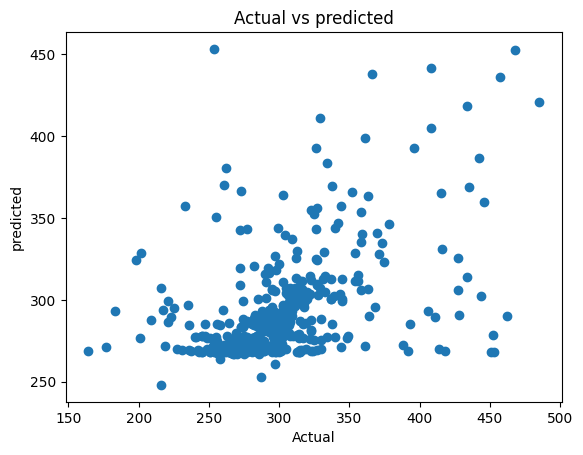

In [69]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model3.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [70]:
y_prd=np.squeeze(np.squeeze(model3.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

16/16 [==============================] - 0s 6ms/step


,Actual,predict,differences
443,287,289.291199,-2.291199
319,317,299.655823,17.344177
703,295,272.066040,22.933960
526,320,304.622375,15.377625
76,435,368.636963,66.363037
1542,231,269.148163,-38.148163
1261,249,276.542206,-27.542206
532,285,286.690277,-1.690277
1294,293,270.239716,22.760284
517,296,282.510193,13.489807


## keras tuner with dense

In [71]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2


C:\Users\rafi\AppData\Local\Temp\ipykernel_10808\1490801469.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [72]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json


In [73]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [74]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [75]:
model4 = tuner.hypermodel.build(best_hps)
model4.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
25/25 [==============================] - 3s 35ms/step - loss: 138.6838 - mean_absolute_error: 138.6838 - val_loss: 87.1972 - val_mean_absolute_error: 87.1972
Epoch 2/2000
25/25 [==============================] - 0s 9ms/step - loss: 78.0218 - mean_absolute_error: 78.0218 - val_loss: 71.1134 - val_mean_absolute_error: 71.1134
Epoch 3/2000
25/25 [==============================] - 0s 10ms/step - loss: 68.5577 - mean_absolute_error: 68.5577 - val_loss: 65.2976 - val_mean_absolute_error: 65.2976
Epoch 4/2000
25/25 [==============================] - 0s 6ms/step - loss: 64.3495 - mean_absolute_error: 64.3495 - val_loss: 74.3242 - val_mean_absolute_error: 74.3242
Epoch 5/2000
25/25 [==============================] - 0s 9ms/step - loss: 64.5764 - mean_absolute_error: 64.5764 - val_loss: 62.3822 - val_mean_absolute_error: 62.3822
Epoch 6/2000
25/25 [==============================] - 0s 9ms/step - loss: 55.2664 - mean_absolute_error: 55.2664 - val_loss: 53.3838 - val_mean_absolute_err

25/25 [==============================] - 0s 7ms/step - loss: 27.0176 - mean_absolute_error: 27.0176 - val_loss: 28.8666 - val_mean_absolute_error: 28.8666
Epoch 98/2000
25/25 [==============================] - 0s 7ms/step - loss: 24.2252 - mean_absolute_error: 24.2252 - val_loss: 36.1277 - val_mean_absolute_error: 36.1277
Epoch 99/2000
25/25 [==============================] - 0s 5ms/step - loss: 26.2123 - mean_absolute_error: 26.2123 - val_loss: 30.0358 - val_mean_absolute_error: 30.0358
Epoch 100/2000
25/25 [==============================] - 0s 8ms/step - loss: 24.7196 - mean_absolute_error: 24.7196 - val_loss: 32.6521 - val_mean_absolute_error: 32.6521
Epoch 101/2000
25/25 [==============================] - 0s 9ms/step - loss: 28.5252 - mean_absolute_error: 28.5252 - val_loss: 29.8613 - val_mean_absolute_error: 29.8613
Epoch 102/2000
25/25 [==============================] - 0s 8ms/step - loss: 27.3044 - mean_absolute_error: 27.3044 - val_loss: 30.4403 - val_mean_absolute_error: 30.44

25/25 [==============================] - 0s 7ms/step - loss: 23.8714 - mean_absolute_error: 23.8714 - val_loss: 28.6147 - val_mean_absolute_error: 28.6147
Epoch 194/2000
25/25 [==============================] - 0s 9ms/step - loss: 27.0082 - mean_absolute_error: 27.0082 - val_loss: 29.5787 - val_mean_absolute_error: 29.5787
Epoch 195/2000
25/25 [==============================] - 0s 7ms/step - loss: 25.1528 - mean_absolute_error: 25.1528 - val_loss: 31.3835 - val_mean_absolute_error: 31.3835
Epoch 196/2000
25/25 [==============================] - 0s 6ms/step - loss: 24.5017 - mean_absolute_error: 24.5017 - val_loss: 29.9212 - val_mean_absolute_error: 29.9212
Epoch 197/2000
25/25 [==============================] - 0s 7ms/step - loss: 27.9835 - mean_absolute_error: 27.9835 - val_loss: 31.0929 - val_mean_absolute_error: 31.0929
Epoch 198/2000
25/25 [==============================] - 0s 10ms/step - loss: 27.1503 - mean_absolute_error: 27.1503 - val_loss: 35.5508 - val_mean_absolute_error: 35

25/25 [==============================] - 0s 6ms/step - loss: 25.7887 - mean_absolute_error: 25.7887 - val_loss: 29.3554 - val_mean_absolute_error: 29.3554
Epoch 290/2000
25/25 [==============================] - 0s 9ms/step - loss: 24.8074 - mean_absolute_error: 24.8074 - val_loss: 32.7712 - val_mean_absolute_error: 32.7712
Epoch 291/2000
25/25 [==============================] - 0s 8ms/step - loss: 24.4921 - mean_absolute_error: 24.4921 - val_loss: 32.0205 - val_mean_absolute_error: 32.0205
Epoch 292/2000
25/25 [==============================] - 0s 8ms/step - loss: 25.5074 - mean_absolute_error: 25.5074 - val_loss: 30.3424 - val_mean_absolute_error: 30.3424
Epoch 293/2000
25/25 [==============================] - 0s 10ms/step - loss: 23.2260 - mean_absolute_error: 23.2260 - val_loss: 28.6156 - val_mean_absolute_error: 28.6156
Epoch 294/2000
25/25 [==============================] - 0s 9ms/step - loss: 25.2240 - mean_absolute_error: 25.2240 - val_loss: 30.5286 - val_mean_absolute_error: 30

25/25 [==============================] - 0s 5ms/step - loss: 25.7927 - mean_absolute_error: 25.7927 - val_loss: 31.4819 - val_mean_absolute_error: 31.4819
Epoch 386/2000
25/25 [==============================] - 0s 8ms/step - loss: 24.5195 - mean_absolute_error: 24.5195 - val_loss: 33.7153 - val_mean_absolute_error: 33.7153
Epoch 387/2000
25/25 [==============================] - 0s 8ms/step - loss: 24.0847 - mean_absolute_error: 24.0847 - val_loss: 28.7312 - val_mean_absolute_error: 28.7312
Epoch 388/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.4126 - mean_absolute_error: 23.4126 - val_loss: 31.8452 - val_mean_absolute_error: 31.8452
Epoch 389/2000
25/25 [==============================] - 0s 5ms/step - loss: 27.0267 - mean_absolute_error: 27.0267 - val_loss: 37.3462 - val_mean_absolute_error: 37.3462
Epoch 390/2000
25/25 [==============================] - 0s 7ms/step - loss: 24.9049 - mean_absolute_error: 24.9049 - val_loss: 30.6662 - val_mean_absolute_error: 30.

25/25 [==============================] - 0s 8ms/step - loss: 23.6448 - mean_absolute_error: 23.6448 - val_loss: 28.7350 - val_mean_absolute_error: 28.7350
Epoch 482/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.6720 - mean_absolute_error: 23.6720 - val_loss: 30.0543 - val_mean_absolute_error: 30.0543
Epoch 483/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.6018 - mean_absolute_error: 23.6018 - val_loss: 28.8258 - val_mean_absolute_error: 28.8258
Epoch 484/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.7590 - mean_absolute_error: 23.7590 - val_loss: 31.5859 - val_mean_absolute_error: 31.5859
Epoch 485/2000
25/25 [==============================] - 0s 7ms/step - loss: 24.8820 - mean_absolute_error: 24.8820 - val_loss: 29.7212 - val_mean_absolute_error: 29.7212
Epoch 486/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.8335 - mean_absolute_error: 23.8335 - val_loss: 30.1164 - val_mean_absolute_error: 30.

25/25 [==============================] - 0s 8ms/step - loss: 23.3105 - mean_absolute_error: 23.3105 - val_loss: 29.8126 - val_mean_absolute_error: 29.8126
Epoch 578/2000
25/25 [==============================] - 0s 7ms/step - loss: 24.0038 - mean_absolute_error: 24.0038 - val_loss: 29.7083 - val_mean_absolute_error: 29.7083
Epoch 579/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.3961 - mean_absolute_error: 23.3961 - val_loss: 30.5385 - val_mean_absolute_error: 30.5385
Epoch 580/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.2745 - mean_absolute_error: 23.2745 - val_loss: 31.0880 - val_mean_absolute_error: 31.0880
Epoch 581/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.1336 - mean_absolute_error: 23.1336 - val_loss: 30.3926 - val_mean_absolute_error: 30.3926
Epoch 582/2000
25/25 [==============================] - 0s 5ms/step - loss: 25.6774 - mean_absolute_error: 25.6774 - val_loss: 28.6724 - val_mean_absolute_error: 28.

25/25 [==============================] - 0s 7ms/step - loss: 24.0374 - mean_absolute_error: 24.0374 - val_loss: 30.5324 - val_mean_absolute_error: 30.5324
Epoch 674/2000
25/25 [==============================] - 0s 5ms/step - loss: 23.9079 - mean_absolute_error: 23.9079 - val_loss: 30.4104 - val_mean_absolute_error: 30.4104
Epoch 675/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.2201 - mean_absolute_error: 23.2201 - val_loss: 29.2830 - val_mean_absolute_error: 29.2830
Epoch 676/2000
25/25 [==============================] - 0s 7ms/step - loss: 24.0364 - mean_absolute_error: 24.0364 - val_loss: 33.3337 - val_mean_absolute_error: 33.3337
Epoch 677/2000
25/25 [==============================] - 0s 6ms/step - loss: 24.8299 - mean_absolute_error: 24.8299 - val_loss: 30.7285 - val_mean_absolute_error: 30.7285
Epoch 678/2000
25/25 [==============================] - 0s 5ms/step - loss: 23.9897 - mean_absolute_error: 23.9897 - val_loss: 31.9820 - val_mean_absolute_error: 31.

25/25 [==============================] - 0s 7ms/step - loss: 23.9271 - mean_absolute_error: 23.9271 - val_loss: 30.8768 - val_mean_absolute_error: 30.8768
Epoch 770/2000
25/25 [==============================] - 0s 6ms/step - loss: 24.0269 - mean_absolute_error: 24.0269 - val_loss: 29.0408 - val_mean_absolute_error: 29.0408
Epoch 771/2000
25/25 [==============================] - 0s 5ms/step - loss: 23.9629 - mean_absolute_error: 23.9629 - val_loss: 30.8239 - val_mean_absolute_error: 30.8239
Epoch 772/2000
25/25 [==============================] - 0s 9ms/step - loss: 23.2091 - mean_absolute_error: 23.2091 - val_loss: 29.4957 - val_mean_absolute_error: 29.4957
Epoch 773/2000
25/25 [==============================] - 0s 9ms/step - loss: 23.5694 - mean_absolute_error: 23.5694 - val_loss: 28.6414 - val_mean_absolute_error: 28.6414
Epoch 774/2000
25/25 [==============================] - 0s 6ms/step - loss: 24.0141 - mean_absolute_error: 24.0141 - val_loss: 29.8229 - val_mean_absolute_error: 29.

25/25 [==============================] - 0s 8ms/step - loss: 23.3611 - mean_absolute_error: 23.3611 - val_loss: 28.4904 - val_mean_absolute_error: 28.4904
Epoch 866/2000
25/25 [==============================] - 0s 6ms/step - loss: 22.8423 - mean_absolute_error: 22.8423 - val_loss: 29.0076 - val_mean_absolute_error: 29.0076
Epoch 867/2000
25/25 [==============================] - 0s 5ms/step - loss: 22.7248 - mean_absolute_error: 22.7248 - val_loss: 30.0548 - val_mean_absolute_error: 30.0548
Epoch 868/2000
25/25 [==============================] - 0s 8ms/step - loss: 24.3701 - mean_absolute_error: 24.3701 - val_loss: 31.5285 - val_mean_absolute_error: 31.5285
Epoch 869/2000
25/25 [==============================] - 0s 9ms/step - loss: 23.4701 - mean_absolute_error: 23.4701 - val_loss: 28.6214 - val_mean_absolute_error: 28.6214
Epoch 870/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.5675 - mean_absolute_error: 23.5675 - val_loss: 28.9416 - val_mean_absolute_error: 28.

25/25 [==============================] - 0s 9ms/step - loss: 23.4598 - mean_absolute_error: 23.4598 - val_loss: 28.6998 - val_mean_absolute_error: 28.6998
Epoch 962/2000
25/25 [==============================] - 0s 10ms/step - loss: 25.4879 - mean_absolute_error: 25.4879 - val_loss: 31.1558 - val_mean_absolute_error: 31.1558
Epoch 963/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.2384 - mean_absolute_error: 23.2384 - val_loss: 28.4872 - val_mean_absolute_error: 28.4872
Epoch 964/2000
25/25 [==============================] - 0s 9ms/step - loss: 22.7271 - mean_absolute_error: 22.7271 - val_loss: 28.7157 - val_mean_absolute_error: 28.7157
Epoch 965/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.7016 - mean_absolute_error: 22.7016 - val_loss: 28.9159 - val_mean_absolute_error: 28.9159
Epoch 966/2000
25/25 [==============================] - 0s 6ms/step - loss: 22.9977 - mean_absolute_error: 22.9977 - val_loss: 30.9410 - val_mean_absolute_error: 30

Epoch 1057/2000
25/25 [==============================] - 0s 6ms/step - loss: 22.8023 - mean_absolute_error: 22.8023 - val_loss: 28.7572 - val_mean_absolute_error: 28.7572
Epoch 1058/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.6118 - mean_absolute_error: 23.6118 - val_loss: 29.0851 - val_mean_absolute_error: 29.0851
Epoch 1059/2000
25/25 [==============================] - 0s 7ms/step - loss: 22.5231 - mean_absolute_error: 22.5231 - val_loss: 28.9158 - val_mean_absolute_error: 28.9158
Epoch 1060/2000
25/25 [==============================] - 0s 6ms/step - loss: 22.6706 - mean_absolute_error: 22.6706 - val_loss: 30.2373 - val_mean_absolute_error: 30.2373
Epoch 1061/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.5183 - mean_absolute_error: 23.5183 - val_loss: 28.6171 - val_mean_absolute_error: 28.6171
Epoch 1062/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.5317 - mean_absolute_error: 23.5317 - val_loss: 29.7294 - val_mea

Epoch 1105/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.6759 - mean_absolute_error: 23.6759 - val_loss: 29.7245 - val_mean_absolute_error: 29.7245
Epoch 1106/2000
25/25 [==============================] - 0s 9ms/step - loss: 22.6083 - mean_absolute_error: 22.6083 - val_loss: 29.0349 - val_mean_absolute_error: 29.0349
Epoch 1107/2000
25/25 [==============================] - 0s 9ms/step - loss: 22.9136 - mean_absolute_error: 22.9136 - val_loss: 29.0952 - val_mean_absolute_error: 29.0952
Epoch 1108/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.0482 - mean_absolute_error: 23.0482 - val_loss: 33.1839 - val_mean_absolute_error: 33.1839
Epoch 1109/2000
25/25 [==============================] - 0s 9ms/step - loss: 24.3389 - mean_absolute_error: 24.3389 - val_loss: 29.3292 - val_mean_absolute_error: 29.3292
Epoch 1110/2000
25/25 [==============================] - 0s 9ms/step - loss: 23.5345 - mean_absolute_error: 23.5345 - val_loss: 29.2414 - val_mea

Epoch 1153/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.6262 - mean_absolute_error: 23.6262 - val_loss: 28.8290 - val_mean_absolute_error: 28.8290
Epoch 1154/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.2487 - mean_absolute_error: 23.2487 - val_loss: 31.8840 - val_mean_absolute_error: 31.8840
Epoch 1155/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.6398 - mean_absolute_error: 23.6398 - val_loss: 28.8918 - val_mean_absolute_error: 28.8918
Epoch 1156/2000
25/25 [==============================] - 0s 10ms/step - loss: 25.1678 - mean_absolute_error: 25.1678 - val_loss: 29.3964 - val_mean_absolute_error: 29.3964
Epoch 1157/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.8142 - mean_absolute_error: 23.8142 - val_loss: 28.4323 - val_mean_absolute_error: 28.4323
Epoch 1158/2000
25/25 [==============================] - 0s 7ms/step - loss: 22.7837 - mean_absolute_error: 22.7837 - val_loss: 28.7696 - val_me

Epoch 1201/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.3719 - mean_absolute_error: 23.3719 - val_loss: 28.9852 - val_mean_absolute_error: 28.9852
Epoch 1202/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.7119 - mean_absolute_error: 22.7119 - val_loss: 29.3123 - val_mean_absolute_error: 29.3123
Epoch 1203/2000
25/25 [==============================] - 0s 10ms/step - loss: 22.6807 - mean_absolute_error: 22.6807 - val_loss: 29.6298 - val_mean_absolute_error: 29.6298
Epoch 1204/2000
25/25 [==============================] - 0s 7ms/step - loss: 22.6135 - mean_absolute_error: 22.6135 - val_loss: 29.8752 - val_mean_absolute_error: 29.8752
Epoch 1205/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.7754 - mean_absolute_error: 23.7754 - val_loss: 29.7121 - val_mean_absolute_error: 29.7121
Epoch 1206/2000
25/25 [==============================] - 0s 10ms/step - loss: 23.2395 - mean_absolute_error: 23.2395 - val_loss: 28.5372 - val_m

Epoch 1249/2000
25/25 [==============================] - 0s 9ms/step - loss: 22.6488 - mean_absolute_error: 22.6488 - val_loss: 28.9738 - val_mean_absolute_error: 28.9738
Epoch 1250/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.1763 - mean_absolute_error: 23.1763 - val_loss: 28.4920 - val_mean_absolute_error: 28.4920
Epoch 1251/2000
25/25 [==============================] - 0s 9ms/step - loss: 22.9225 - mean_absolute_error: 22.9225 - val_loss: 29.4945 - val_mean_absolute_error: 29.4945
Epoch 1252/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.8742 - mean_absolute_error: 23.8742 - val_loss: 29.4725 - val_mean_absolute_error: 29.4725
Epoch 1253/2000
25/25 [==============================] - 0s 6ms/step - loss: 22.6686 - mean_absolute_error: 22.6686 - val_loss: 28.7412 - val_mean_absolute_error: 28.7413
Epoch 1254/2000
25/25 [==============================] - 0s 6ms/step - loss: 22.6876 - mean_absolute_error: 22.6876 - val_loss: 29.7102 - val_mea

Epoch 1297/2000
25/25 [==============================] - 0s 10ms/step - loss: 23.6374 - mean_absolute_error: 23.6374 - val_loss: 32.0206 - val_mean_absolute_error: 32.0206
Epoch 1298/2000
25/25 [==============================] - 0s 8ms/step - loss: 24.1252 - mean_absolute_error: 24.1252 - val_loss: 29.4153 - val_mean_absolute_error: 29.4153
Epoch 1299/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.4269 - mean_absolute_error: 23.4269 - val_loss: 29.9916 - val_mean_absolute_error: 29.9916
Epoch 1300/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.6356 - mean_absolute_error: 22.6356 - val_loss: 29.7291 - val_mean_absolute_error: 29.7291
Epoch 1301/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.7890 - mean_absolute_error: 22.7890 - val_loss: 30.7302 - val_mean_absolute_error: 30.7302
Epoch 1302/2000
25/25 [==============================] - 0s 6ms/step - loss: 22.6900 - mean_absolute_error: 22.6900 - val_loss: 28.4384 - val_me

Epoch 1345/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.8858 - mean_absolute_error: 22.8858 - val_loss: 28.8339 - val_mean_absolute_error: 28.8339
Epoch 1346/2000
25/25 [==============================] - 0s 7ms/step - loss: 22.3777 - mean_absolute_error: 22.3777 - val_loss: 28.6849 - val_mean_absolute_error: 28.6849
Epoch 1347/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.9700 - mean_absolute_error: 22.9700 - val_loss: 30.3580 - val_mean_absolute_error: 30.3580
Epoch 1348/2000
25/25 [==============================] - 0s 10ms/step - loss: 23.1734 - mean_absolute_error: 23.1734 - val_loss: 28.9266 - val_mean_absolute_error: 28.9266
Epoch 1349/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.0737 - mean_absolute_error: 23.0737 - val_loss: 28.9847 - val_mean_absolute_error: 28.9847
Epoch 1350/2000
25/25 [==============================] - 0s 10ms/step - loss: 23.1296 - mean_absolute_error: 23.1296 - val_loss: 28.8669 - val_m

Epoch 1393/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.8094 - mean_absolute_error: 23.8094 - val_loss: 28.2315 - val_mean_absolute_error: 28.2315
Epoch 1394/2000
25/25 [==============================] - 0s 9ms/step - loss: 24.3911 - mean_absolute_error: 24.3911 - val_loss: 30.6389 - val_mean_absolute_error: 30.6389
Epoch 1395/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.9075 - mean_absolute_error: 23.9075 - val_loss: 29.4566 - val_mean_absolute_error: 29.4566
Epoch 1396/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.2937 - mean_absolute_error: 23.2937 - val_loss: 30.1765 - val_mean_absolute_error: 30.1765
Epoch 1397/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.7641 - mean_absolute_error: 23.7641 - val_loss: 28.4900 - val_mean_absolute_error: 28.4900
Epoch 1398/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.5493 - mean_absolute_error: 23.5493 - val_loss: 30.3341 - val_mea

Epoch 1441/2000
25/25 [==============================] - 0s 7ms/step - loss: 25.2357 - mean_absolute_error: 25.2357 - val_loss: 34.7459 - val_mean_absolute_error: 34.7459
Epoch 1442/2000
25/25 [==============================] - 0s 9ms/step - loss: 23.8644 - mean_absolute_error: 23.8644 - val_loss: 29.2396 - val_mean_absolute_error: 29.2396
Epoch 1443/2000
25/25 [==============================] - 0s 10ms/step - loss: 23.1632 - mean_absolute_error: 23.1632 - val_loss: 30.1419 - val_mean_absolute_error: 30.1419
Epoch 1444/2000
25/25 [==============================] - 0s 5ms/step - loss: 22.7703 - mean_absolute_error: 22.7703 - val_loss: 29.0166 - val_mean_absolute_error: 29.0166
Epoch 1445/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.8621 - mean_absolute_error: 23.8621 - val_loss: 30.8423 - val_mean_absolute_error: 30.8423
Epoch 1446/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.3083 - mean_absolute_error: 23.3083 - val_loss: 32.2706 - val_me

Epoch 1489/2000
25/25 [==============================] - 0s 9ms/step - loss: 22.8196 - mean_absolute_error: 22.8196 - val_loss: 29.2430 - val_mean_absolute_error: 29.2430
Epoch 1490/2000
25/25 [==============================] - 0s 7ms/step - loss: 24.3353 - mean_absolute_error: 24.3353 - val_loss: 28.8300 - val_mean_absolute_error: 28.8300
Epoch 1491/2000
25/25 [==============================] - 0s 11ms/step - loss: 24.5771 - mean_absolute_error: 24.5771 - val_loss: 30.0462 - val_mean_absolute_error: 30.0462
Epoch 1492/2000
25/25 [==============================] - 0s 11ms/step - loss: 23.6258 - mean_absolute_error: 23.6258 - val_loss: 31.7639 - val_mean_absolute_error: 31.7639
Epoch 1493/2000
25/25 [==============================] - 0s 10ms/step - loss: 22.9861 - mean_absolute_error: 22.9861 - val_loss: 29.6842 - val_mean_absolute_error: 29.6842
Epoch 1494/2000
25/25 [==============================] - 0s 12ms/step - loss: 23.3273 - mean_absolute_error: 23.3273 - val_loss: 28.5820 - val

Epoch 1537/2000
25/25 [==============================] - 0s 7ms/step - loss: 22.4328 - mean_absolute_error: 22.4328 - val_loss: 29.3516 - val_mean_absolute_error: 29.3516
Epoch 1538/2000
25/25 [==============================] - 0s 6ms/step - loss: 22.7922 - mean_absolute_error: 22.7922 - val_loss: 29.8988 - val_mean_absolute_error: 29.8988
Epoch 1539/2000
25/25 [==============================] - 0s 6ms/step - loss: 24.6607 - mean_absolute_error: 24.6607 - val_loss: 30.8650 - val_mean_absolute_error: 30.8650
Epoch 1540/2000
25/25 [==============================] - 0s 9ms/step - loss: 23.0343 - mean_absolute_error: 23.0343 - val_loss: 29.3757 - val_mean_absolute_error: 29.3757
Epoch 1541/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.4142 - mean_absolute_error: 23.4142 - val_loss: 29.3182 - val_mean_absolute_error: 29.3182
Epoch 1542/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.4511 - mean_absolute_error: 23.4511 - val_loss: 29.4636 - val_mea

Epoch 1585/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.2584 - mean_absolute_error: 23.2584 - val_loss: 30.5539 - val_mean_absolute_error: 30.5539
Epoch 1586/2000
25/25 [==============================] - 0s 10ms/step - loss: 22.9288 - mean_absolute_error: 22.9288 - val_loss: 28.5215 - val_mean_absolute_error: 28.5215
Epoch 1587/2000
25/25 [==============================] - 0s 6ms/step - loss: 22.9762 - mean_absolute_error: 22.9762 - val_loss: 28.5895 - val_mean_absolute_error: 28.5895
Epoch 1588/2000
25/25 [==============================] - 0s 6ms/step - loss: 22.6544 - mean_absolute_error: 22.6544 - val_loss: 29.2498 - val_mean_absolute_error: 29.2498
Epoch 1589/2000
25/25 [==============================] - 0s 5ms/step - loss: 23.8049 - mean_absolute_error: 23.8049 - val_loss: 29.2124 - val_mean_absolute_error: 29.2124
Epoch 1590/2000
25/25 [==============================] - 0s 12ms/step - loss: 22.9029 - mean_absolute_error: 22.9029 - val_loss: 28.5387 - val_m

Epoch 1633/2000
25/25 [==============================] - 0s 8ms/step - loss: 24.0949 - mean_absolute_error: 24.0949 - val_loss: 30.3635 - val_mean_absolute_error: 30.3635
Epoch 1634/2000
25/25 [==============================] - 0s 7ms/step - loss: 24.6392 - mean_absolute_error: 24.6392 - val_loss: 29.1305 - val_mean_absolute_error: 29.1305
Epoch 1635/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.8615 - mean_absolute_error: 22.8615 - val_loss: 28.9370 - val_mean_absolute_error: 28.9370
Epoch 1636/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.9828 - mean_absolute_error: 22.9828 - val_loss: 28.0880 - val_mean_absolute_error: 28.0880
Epoch 1637/2000
25/25 [==============================] - 0s 7ms/step - loss: 24.3910 - mean_absolute_error: 24.3910 - val_loss: 29.9205 - val_mean_absolute_error: 29.9205
Epoch 1638/2000
25/25 [==============================] - 0s 5ms/step - loss: 22.5370 - mean_absolute_error: 22.5370 - val_loss: 29.6011 - val_mea

Epoch 1681/2000
25/25 [==============================] - 0s 5ms/step - loss: 23.7076 - mean_absolute_error: 23.7076 - val_loss: 30.6010 - val_mean_absolute_error: 30.6010
Epoch 1682/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.2901 - mean_absolute_error: 23.2901 - val_loss: 30.6203 - val_mean_absolute_error: 30.6203
Epoch 1683/2000
25/25 [==============================] - 0s 8ms/step - loss: 23.6958 - mean_absolute_error: 23.6958 - val_loss: 31.0985 - val_mean_absolute_error: 31.0985
Epoch 1684/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.8352 - mean_absolute_error: 23.8352 - val_loss: 29.5335 - val_mean_absolute_error: 29.5335
Epoch 1685/2000
25/25 [==============================] - 0s 5ms/step - loss: 23.1956 - mean_absolute_error: 23.1956 - val_loss: 29.9457 - val_mean_absolute_error: 29.9457
Epoch 1686/2000
25/25 [==============================] - 0s 7ms/step - loss: 22.6919 - mean_absolute_error: 22.6919 - val_loss: 28.1477 - val_mea

Epoch 1729/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.1538 - mean_absolute_error: 23.1538 - val_loss: 29.8614 - val_mean_absolute_error: 29.8614
Epoch 1730/2000
25/25 [==============================] - 0s 7ms/step - loss: 22.5475 - mean_absolute_error: 22.5475 - val_loss: 28.8942 - val_mean_absolute_error: 28.8942
Epoch 1731/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.9975 - mean_absolute_error: 22.9975 - val_loss: 30.1518 - val_mean_absolute_error: 30.1518
Epoch 1732/2000
25/25 [==============================] - 0s 7ms/step - loss: 22.4606 - mean_absolute_error: 22.4606 - val_loss: 32.9486 - val_mean_absolute_error: 32.9486
Epoch 1733/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.5976 - mean_absolute_error: 23.5976 - val_loss: 29.5458 - val_mean_absolute_error: 29.5458
Epoch 1734/2000
25/25 [==============================] - 0s 9ms/step - loss: 23.4164 - mean_absolute_error: 23.4164 - val_loss: 29.5536 - val_mea

Epoch 1777/2000
25/25 [==============================] - 0s 7ms/step - loss: 22.8862 - mean_absolute_error: 22.8862 - val_loss: 30.8762 - val_mean_absolute_error: 30.8762
Epoch 1778/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.0597 - mean_absolute_error: 23.0597 - val_loss: 29.7156 - val_mean_absolute_error: 29.7156
Epoch 1779/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.4291 - mean_absolute_error: 23.4291 - val_loss: 29.3828 - val_mean_absolute_error: 29.3828
Epoch 1780/2000
25/25 [==============================] - 0s 8ms/step - loss: 24.7748 - mean_absolute_error: 24.7748 - val_loss: 31.2265 - val_mean_absolute_error: 31.2265
Epoch 1781/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.6661 - mean_absolute_error: 23.6661 - val_loss: 28.3944 - val_mean_absolute_error: 28.3944
Epoch 1782/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.0459 - mean_absolute_error: 23.0459 - val_loss: 28.2686 - val_mea

Epoch 1825/2000
25/25 [==============================] - 0s 11ms/step - loss: 23.4584 - mean_absolute_error: 23.4584 - val_loss: 31.5393 - val_mean_absolute_error: 31.5393
Epoch 1826/2000
25/25 [==============================] - 0s 8ms/step - loss: 25.2918 - mean_absolute_error: 25.2918 - val_loss: 28.9056 - val_mean_absolute_error: 28.9056
Epoch 1827/2000
25/25 [==============================] - 0s 10ms/step - loss: 25.1284 - mean_absolute_error: 25.1284 - val_loss: 29.3086 - val_mean_absolute_error: 29.3086
Epoch 1828/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.6672 - mean_absolute_error: 22.6672 - val_loss: 29.0902 - val_mean_absolute_error: 29.0902
Epoch 1829/2000
25/25 [==============================] - 0s 5ms/step - loss: 22.7629 - mean_absolute_error: 22.7629 - val_loss: 28.8652 - val_mean_absolute_error: 28.8652
Epoch 1830/2000
25/25 [==============================] - 0s 8ms/step - loss: 22.8130 - mean_absolute_error: 22.8130 - val_loss: 28.8146 - val_m

Epoch 1873/2000
25/25 [==============================] - 0s 9ms/step - loss: 22.8303 - mean_absolute_error: 22.8303 - val_loss: 28.3933 - val_mean_absolute_error: 28.3933
Epoch 1874/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.4428 - mean_absolute_error: 23.4428 - val_loss: 30.0955 - val_mean_absolute_error: 30.0955
Epoch 1875/2000
25/25 [==============================] - 0s 6ms/step - loss: 23.1851 - mean_absolute_error: 23.1851 - val_loss: 28.8167 - val_mean_absolute_error: 28.8167
Epoch 1876/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.4737 - mean_absolute_error: 23.4737 - val_loss: 29.3418 - val_mean_absolute_error: 29.3418
Epoch 1877/2000
25/25 [==============================] - 0s 7ms/step - loss: 23.2052 - mean_absolute_error: 23.2052 - val_loss: 28.7834 - val_mean_absolute_error: 28.7834
Epoch 1878/2000
25/25 [==============================] - 0s 6ms/step - loss: 24.8725 - mean_absolute_error: 24.8725 - val_loss: 31.1171 - val_mea

Epoch 1921/2000
25/25 [==============================] - 0s 11ms/step - loss: 23.3534 - mean_absolute_error: 23.3534 - val_loss: 29.3195 - val_mean_absolute_error: 29.3195
Epoch 1922/2000
25/25 [==============================] - 0s 9ms/step - loss: 22.8338 - mean_absolute_error: 22.8338 - val_loss: 28.5050 - val_mean_absolute_error: 28.5050
Epoch 1923/2000
25/25 [==============================] - 0s 12ms/step - loss: 22.9433 - mean_absolute_error: 22.9433 - val_loss: 29.4843 - val_mean_absolute_error: 29.4843
Epoch 1924/2000
25/25 [==============================] - 0s 10ms/step - loss: 23.2477 - mean_absolute_error: 23.2477 - val_loss: 30.7417 - val_mean_absolute_error: 30.7417
Epoch 1925/2000
25/25 [==============================] - 0s 12ms/step - loss: 23.3699 - mean_absolute_error: 23.3699 - val_loss: 29.0634 - val_mean_absolute_error: 29.0634
Epoch 1926/2000
25/25 [==============================] - 0s 13ms/step - loss: 22.7751 - mean_absolute_error: 22.7751 - val_loss: 30.2983 - va

Epoch 1969/2000
25/25 [==============================] - 0s 11ms/step - loss: 23.1491 - mean_absolute_error: 23.1491 - val_loss: 29.3243 - val_mean_absolute_error: 29.3243
Epoch 1970/2000
25/25 [==============================] - 0s 7ms/step - loss: 24.2990 - mean_absolute_error: 24.2990 - val_loss: 31.0604 - val_mean_absolute_error: 31.0604
Epoch 1971/2000
25/25 [==============================] - 0s 11ms/step - loss: 23.4939 - mean_absolute_error: 23.4939 - val_loss: 32.4410 - val_mean_absolute_error: 32.4410
Epoch 1972/2000
25/25 [==============================] - 0s 14ms/step - loss: 24.1538 - mean_absolute_error: 24.1538 - val_loss: 32.2734 - val_mean_absolute_error: 32.2734
Epoch 1973/2000
25/25 [==============================] - 0s 12ms/step - loss: 23.9932 - mean_absolute_error: 23.9932 - val_loss: 29.1392 - val_mean_absolute_error: 29.1392
Epoch 1974/2000
25/25 [==============================] - 0s 12ms/step - loss: 23.2157 - mean_absolute_error: 23.2157 - val_loss: 28.6854 - va

In [76]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model4.predict(X_test)) )

16/16 [==============================] - 0s 2ms/step


0.19431020251397102

In [77]:
prediction =np.squeeze(model4.predict([[80,2,2]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 542ms/step
Prediction: 282.62841796875


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model4.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model4.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

16/16 [==============================] - 0s 2ms/step
mean squired error: 1602.1353513093065
mean absolute error: 24.496711168132844


16/16 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Actual vs predicted')

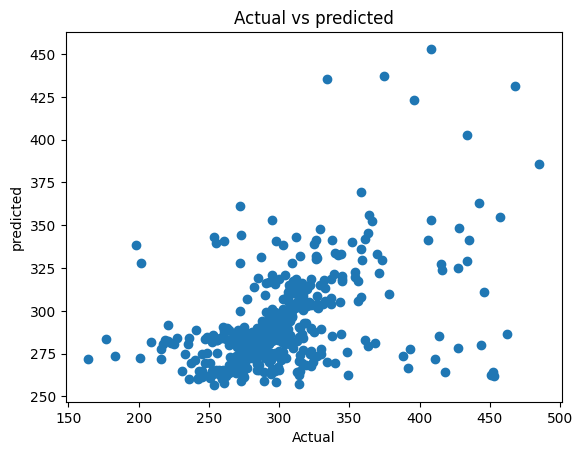

In [79]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model4.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [80]:
y_prd=np.squeeze(np.squeeze(model4.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

16/16 [==============================] - 0s 2ms/step


,Actual,predict,differences
443,287,290.507385,-3.507385
319,317,305.658264,11.341736
703,295,283.649597,11.350403
526,320,312.630493,7.369507
76,435,341.561432,93.438568
1542,231,264.801941,-33.801941
1261,249,275.150024,-26.150024
532,285,286.169312,-1.169312
1294,293,270.340454,22.659546
517,296,288.442078,7.557922


## Keras tuner with RNN

In [81]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [82]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json


In [83]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [84]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [85]:
model5 = tuner.hypermodel.build(best_hps)
model5.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
25/25 [==============================] - 14s 117ms/step - loss: 118.9815 - mean_absolute_error: 118.9815 - val_loss: 42.9017 - val_mean_absolute_error: 42.9017
Epoch 2/2000
25/25 [==============================] - 1s 32ms/step - loss: 42.0576 - mean_absolute_error: 42.0576 - val_loss: 35.7865 - val_mean_absolute_error: 35.7865
Epoch 3/2000
25/25 [==============================] - 1s 32ms/step - loss: 33.5725 - mean_absolute_error: 33.5725 - val_loss: 35.6917 - val_mean_absolute_error: 35.6917
Epoch 4/2000
25/25 [==============================] - 1s 34ms/step - loss: 31.3316 - mean_absolute_error: 31.3316 - val_loss: 39.7549 - val_mean_absolute_error: 39.7549
Epoch 5/2000
25/25 [==============================] - 1s 35ms/step - loss: 33.4815 - mean_absolute_error: 33.4815 - val_loss: 34.8299 - val_mean_absolute_error: 34.8299
Epoch 6/2000
25/25 [==============================] - 1s 38ms/step - loss: 29.6876 - mean_absolute_error: 29.6876 - val_loss: 32.4628 - val_mean_absolu

25/25 [==============================] - 1s 36ms/step - loss: 25.0979 - mean_absolute_error: 25.0979 - val_loss: 31.9008 - val_mean_absolute_error: 31.9008
Epoch 98/2000
25/25 [==============================] - 1s 33ms/step - loss: 26.4252 - mean_absolute_error: 26.4252 - val_loss: 30.6838 - val_mean_absolute_error: 30.6838
Epoch 99/2000
25/25 [==============================] - 1s 36ms/step - loss: 24.5407 - mean_absolute_error: 24.5407 - val_loss: 31.2077 - val_mean_absolute_error: 31.2077
Epoch 100/2000
25/25 [==============================] - 1s 34ms/step - loss: 26.0488 - mean_absolute_error: 26.0488 - val_loss: 30.7541 - val_mean_absolute_error: 30.7541
Epoch 101/2000
25/25 [==============================] - 1s 36ms/step - loss: 25.1203 - mean_absolute_error: 25.1203 - val_loss: 34.3896 - val_mean_absolute_error: 34.3896
Epoch 102/2000
25/25 [==============================] - 1s 33ms/step - loss: 26.4792 - mean_absolute_error: 26.4792 - val_loss: 32.1180 - val_mean_absolute_error:

25/25 [==============================] - 1s 31ms/step - loss: 24.3684 - mean_absolute_error: 24.3684 - val_loss: 32.1942 - val_mean_absolute_error: 32.1942
Epoch 146/2000
25/25 [==============================] - 1s 32ms/step - loss: 25.1536 - mean_absolute_error: 25.1536 - val_loss: 29.8693 - val_mean_absolute_error: 29.8693
Epoch 147/2000
25/25 [==============================] - 1s 36ms/step - loss: 25.0691 - mean_absolute_error: 25.0691 - val_loss: 31.1187 - val_mean_absolute_error: 31.1187
Epoch 148/2000
25/25 [==============================] - 1s 36ms/step - loss: 24.1586 - mean_absolute_error: 24.1586 - val_loss: 32.1590 - val_mean_absolute_error: 32.1590
Epoch 149/2000
25/25 [==============================] - 1s 29ms/step - loss: 25.2984 - mean_absolute_error: 25.2984 - val_loss: 29.9827 - val_mean_absolute_error: 29.9827
Epoch 150/2000
25/25 [==============================] - 1s 35ms/step - loss: 26.1466 - mean_absolute_error: 26.1466 - val_loss: 32.8382 - val_mean_absolute_erro

Epoch 193/2000
25/25 [==============================] - 1s 32ms/step - loss: 24.5285 - mean_absolute_error: 24.5285 - val_loss: 29.6668 - val_mean_absolute_error: 29.6668
Epoch 194/2000
25/25 [==============================] - 1s 33ms/step - loss: 25.1124 - mean_absolute_error: 25.1124 - val_loss: 29.9751 - val_mean_absolute_error: 29.9751
Epoch 195/2000
25/25 [==============================] - 1s 34ms/step - loss: 24.2324 - mean_absolute_error: 24.2324 - val_loss: 31.2878 - val_mean_absolute_error: 31.2878
Epoch 196/2000
25/25 [==============================] - 1s 36ms/step - loss: 24.2370 - mean_absolute_error: 24.2370 - val_loss: 31.9651 - val_mean_absolute_error: 31.9651
Epoch 197/2000
25/25 [==============================] - 1s 33ms/step - loss: 24.5274 - mean_absolute_error: 24.5274 - val_loss: 32.4798 - val_mean_absolute_error: 32.4798
Epoch 198/2000
25/25 [==============================] - 1s 34ms/step - loss: 23.6657 - mean_absolute_error: 23.6657 - val_loss: 30.0759 - val_mea

Epoch 241/2000
25/25 [==============================] - 1s 32ms/step - loss: 24.6861 - mean_absolute_error: 24.6861 - val_loss: 29.0723 - val_mean_absolute_error: 29.0723
Epoch 242/2000
25/25 [==============================] - 1s 35ms/step - loss: 23.4827 - mean_absolute_error: 23.4827 - val_loss: 30.1749 - val_mean_absolute_error: 30.1749
Epoch 243/2000
25/25 [==============================] - 1s 35ms/step - loss: 23.3675 - mean_absolute_error: 23.3675 - val_loss: 29.1398 - val_mean_absolute_error: 29.1398
Epoch 244/2000
25/25 [==============================] - 1s 32ms/step - loss: 23.5136 - mean_absolute_error: 23.5136 - val_loss: 29.8727 - val_mean_absolute_error: 29.8727
Epoch 245/2000
25/25 [==============================] - 1s 34ms/step - loss: 23.4839 - mean_absolute_error: 23.4839 - val_loss: 32.1518 - val_mean_absolute_error: 32.1518
Epoch 246/2000
25/25 [==============================] - 1s 36ms/step - loss: 23.5560 - mean_absolute_error: 23.5560 - val_loss: 29.0123 - val_mea

Epoch 289/2000
25/25 [==============================] - 1s 41ms/step - loss: 24.0688 - mean_absolute_error: 24.0688 - val_loss: 30.1022 - val_mean_absolute_error: 30.1022
Epoch 290/2000
25/25 [==============================] - 1s 35ms/step - loss: 24.1106 - mean_absolute_error: 24.1106 - val_loss: 30.7380 - val_mean_absolute_error: 30.7380
Epoch 291/2000
25/25 [==============================] - 1s 35ms/step - loss: 25.3073 - mean_absolute_error: 25.3073 - val_loss: 29.7093 - val_mean_absolute_error: 29.7093
Epoch 292/2000
25/25 [==============================] - 1s 37ms/step - loss: 23.5528 - mean_absolute_error: 23.5528 - val_loss: 29.2444 - val_mean_absolute_error: 29.2444
Epoch 293/2000
25/25 [==============================] - 1s 36ms/step - loss: 22.8826 - mean_absolute_error: 22.8826 - val_loss: 29.5187 - val_mean_absolute_error: 29.5187
Epoch 294/2000
25/25 [==============================] - 1s 35ms/step - loss: 24.6682 - mean_absolute_error: 24.6682 - val_loss: 29.9453 - val_mea

Epoch 337/2000
25/25 [==============================] - 1s 35ms/step - loss: 25.7624 - mean_absolute_error: 25.7624 - val_loss: 30.5708 - val_mean_absolute_error: 30.5708
Epoch 338/2000
25/25 [==============================] - 1s 33ms/step - loss: 22.2634 - mean_absolute_error: 22.2634 - val_loss: 28.6271 - val_mean_absolute_error: 28.6271
Epoch 339/2000
25/25 [==============================] - 1s 34ms/step - loss: 23.2904 - mean_absolute_error: 23.2904 - val_loss: 28.3022 - val_mean_absolute_error: 28.3022
Epoch 340/2000
25/25 [==============================] - 1s 32ms/step - loss: 23.3761 - mean_absolute_error: 23.3761 - val_loss: 29.0669 - val_mean_absolute_error: 29.0669
Epoch 341/2000
25/25 [==============================] - 1s 33ms/step - loss: 22.2810 - mean_absolute_error: 22.2810 - val_loss: 28.7642 - val_mean_absolute_error: 28.7642
Epoch 342/2000
25/25 [==============================] - 1s 32ms/step - loss: 23.0881 - mean_absolute_error: 23.0881 - val_loss: 29.4088 - val_mea

Epoch 385/2000
25/25 [==============================] - 1s 35ms/step - loss: 21.9089 - mean_absolute_error: 21.9089 - val_loss: 28.1632 - val_mean_absolute_error: 28.1632
Epoch 386/2000
25/25 [==============================] - 1s 35ms/step - loss: 22.1165 - mean_absolute_error: 22.1165 - val_loss: 28.3681 - val_mean_absolute_error: 28.3681
Epoch 387/2000
25/25 [==============================] - 1s 37ms/step - loss: 23.5039 - mean_absolute_error: 23.5039 - val_loss: 28.7138 - val_mean_absolute_error: 28.7138
Epoch 388/2000
25/25 [==============================] - 1s 35ms/step - loss: 24.5173 - mean_absolute_error: 24.5173 - val_loss: 30.6199 - val_mean_absolute_error: 30.6199
Epoch 389/2000
25/25 [==============================] - 1s 33ms/step - loss: 22.9874 - mean_absolute_error: 22.9874 - val_loss: 30.0198 - val_mean_absolute_error: 30.0198
Epoch 390/2000
25/25 [==============================] - 1s 33ms/step - loss: 23.6773 - mean_absolute_error: 23.6773 - val_loss: 31.2558 - val_mea

Epoch 433/2000
25/25 [==============================] - 1s 40ms/step - loss: 24.0529 - mean_absolute_error: 24.0529 - val_loss: 28.9411 - val_mean_absolute_error: 28.9411
Epoch 434/2000
25/25 [==============================] - 1s 47ms/step - loss: 23.1000 - mean_absolute_error: 23.1000 - val_loss: 29.1481 - val_mean_absolute_error: 29.1481
Epoch 435/2000
25/25 [==============================] - 1s 44ms/step - loss: 22.0903 - mean_absolute_error: 22.0903 - val_loss: 29.2501 - val_mean_absolute_error: 29.2501
Epoch 436/2000
25/25 [==============================] - 1s 37ms/step - loss: 22.3246 - mean_absolute_error: 22.3246 - val_loss: 28.7206 - val_mean_absolute_error: 28.7206
Epoch 437/2000
25/25 [==============================] - 1s 45ms/step - loss: 21.9293 - mean_absolute_error: 21.9293 - val_loss: 28.4578 - val_mean_absolute_error: 28.4578
Epoch 438/2000
25/25 [==============================] - 1s 34ms/step - loss: 21.8506 - mean_absolute_error: 21.8506 - val_loss: 29.7279 - val_mea

Epoch 481/2000
25/25 [==============================] - 1s 33ms/step - loss: 22.0682 - mean_absolute_error: 22.0682 - val_loss: 28.4196 - val_mean_absolute_error: 28.4196
Epoch 482/2000
25/25 [==============================] - 1s 34ms/step - loss: 22.5574 - mean_absolute_error: 22.5574 - val_loss: 29.8768 - val_mean_absolute_error: 29.8768
Epoch 483/2000
25/25 [==============================] - 1s 37ms/step - loss: 23.5631 - mean_absolute_error: 23.5631 - val_loss: 29.4417 - val_mean_absolute_error: 29.4417
Epoch 484/2000
25/25 [==============================] - 1s 29ms/step - loss: 23.5507 - mean_absolute_error: 23.5507 - val_loss: 29.8512 - val_mean_absolute_error: 29.8512
Epoch 485/2000
25/25 [==============================] - 1s 32ms/step - loss: 21.9172 - mean_absolute_error: 21.9172 - val_loss: 29.3599 - val_mean_absolute_error: 29.3599
Epoch 486/2000
25/25 [==============================] - 1s 26ms/step - loss: 22.1321 - mean_absolute_error: 22.1321 - val_loss: 28.4066 - val_mea

Epoch 529/2000
25/25 [==============================] - 1s 28ms/step - loss: 22.2963 - mean_absolute_error: 22.2963 - val_loss: 28.9440 - val_mean_absolute_error: 28.9440
Epoch 530/2000
25/25 [==============================] - 1s 35ms/step - loss: 22.2563 - mean_absolute_error: 22.2563 - val_loss: 28.6034 - val_mean_absolute_error: 28.6034
Epoch 531/2000
25/25 [==============================] - 1s 30ms/step - loss: 21.8647 - mean_absolute_error: 21.8647 - val_loss: 28.3730 - val_mean_absolute_error: 28.3730
Epoch 532/2000
25/25 [==============================] - 1s 29ms/step - loss: 23.2702 - mean_absolute_error: 23.2702 - val_loss: 30.9295 - val_mean_absolute_error: 30.9295
Epoch 533/2000
25/25 [==============================] - 1s 30ms/step - loss: 22.2430 - mean_absolute_error: 22.2430 - val_loss: 28.4172 - val_mean_absolute_error: 28.4172
Epoch 534/2000
25/25 [==============================] - 1s 30ms/step - loss: 22.5135 - mean_absolute_error: 22.5135 - val_loss: 28.4034 - val_mea

Epoch 577/2000
25/25 [==============================] - 1s 40ms/step - loss: 23.6705 - mean_absolute_error: 23.6705 - val_loss: 31.1200 - val_mean_absolute_error: 31.1200
Epoch 578/2000
25/25 [==============================] - 1s 41ms/step - loss: 24.1956 - mean_absolute_error: 24.1956 - val_loss: 28.3243 - val_mean_absolute_error: 28.3243
Epoch 579/2000
25/25 [==============================] - 1s 38ms/step - loss: 23.6245 - mean_absolute_error: 23.6245 - val_loss: 30.4405 - val_mean_absolute_error: 30.4405
Epoch 580/2000
25/25 [==============================] - 1s 35ms/step - loss: 23.7087 - mean_absolute_error: 23.7087 - val_loss: 28.8093 - val_mean_absolute_error: 28.8093
Epoch 581/2000
25/25 [==============================] - 1s 37ms/step - loss: 21.9425 - mean_absolute_error: 21.9425 - val_loss: 28.2654 - val_mean_absolute_error: 28.2654
Epoch 582/2000
25/25 [==============================] - 1s 41ms/step - loss: 23.0558 - mean_absolute_error: 23.0558 - val_loss: 32.5344 - val_mea

Epoch 625/2000
25/25 [==============================] - 1s 26ms/step - loss: 21.7528 - mean_absolute_error: 21.7528 - val_loss: 28.3059 - val_mean_absolute_error: 28.3059
Epoch 626/2000
25/25 [==============================] - 1s 30ms/step - loss: 21.6509 - mean_absolute_error: 21.6509 - val_loss: 29.2488 - val_mean_absolute_error: 29.2488
Epoch 627/2000
25/25 [==============================] - 1s 26ms/step - loss: 22.1316 - mean_absolute_error: 22.1316 - val_loss: 29.7409 - val_mean_absolute_error: 29.7409
Epoch 628/2000
25/25 [==============================] - 1s 27ms/step - loss: 22.1191 - mean_absolute_error: 22.1191 - val_loss: 28.1399 - val_mean_absolute_error: 28.1399
Epoch 629/2000
25/25 [==============================] - 1s 28ms/step - loss: 22.2031 - mean_absolute_error: 22.2031 - val_loss: 29.2821 - val_mean_absolute_error: 29.2821
Epoch 630/2000
25/25 [==============================] - 1s 24ms/step - loss: 22.0596 - mean_absolute_error: 22.0596 - val_loss: 30.2193 - val_mea

Epoch 933/2000
25/25 [==============================] - 1s 23ms/step - loss: 22.9530 - mean_absolute_error: 22.9530 - val_loss: 31.7070 - val_mean_absolute_error: 31.7070
Epoch 934/2000
25/25 [==============================] - 1s 23ms/step - loss: 22.8915 - mean_absolute_error: 22.8915 - val_loss: 28.4229 - val_mean_absolute_error: 28.4229
Epoch 935/2000
25/25 [==============================] - 1s 23ms/step - loss: 23.1018 - mean_absolute_error: 23.1018 - val_loss: 28.7918 - val_mean_absolute_error: 28.7918
Epoch 936/2000
25/25 [==============================] - 1s 22ms/step - loss: 21.8718 - mean_absolute_error: 21.8718 - val_loss: 28.5365 - val_mean_absolute_error: 28.5365
Epoch 937/2000
25/25 [==============================] - 1s 24ms/step - loss: 22.5825 - mean_absolute_error: 22.5825 - val_loss: 28.8357 - val_mean_absolute_error: 28.8357
Epoch 938/2000
25/25 [==============================] - 1s 22ms/step - loss: 22.1862 - mean_absolute_error: 22.1862 - val_loss: 29.4979 - val_mea

Epoch 981/2000
25/25 [==============================] - 1s 25ms/step - loss: 21.4358 - mean_absolute_error: 21.4358 - val_loss: 28.1245 - val_mean_absolute_error: 28.1245
Epoch 982/2000
25/25 [==============================] - 1s 27ms/step - loss: 22.1157 - mean_absolute_error: 22.1157 - val_loss: 30.2808 - val_mean_absolute_error: 30.2808
Epoch 983/2000
25/25 [==============================] - 1s 24ms/step - loss: 22.6374 - mean_absolute_error: 22.6374 - val_loss: 29.9743 - val_mean_absolute_error: 29.9743
Epoch 984/2000
25/25 [==============================] - 1s 23ms/step - loss: 22.8324 - mean_absolute_error: 22.8324 - val_loss: 28.2317 - val_mean_absolute_error: 28.2317
Epoch 985/2000
25/25 [==============================] - 1s 23ms/step - loss: 21.6154 - mean_absolute_error: 21.6154 - val_loss: 31.5437 - val_mean_absolute_error: 31.5437
Epoch 986/2000
25/25 [==============================] - 1s 22ms/step - loss: 24.3095 - mean_absolute_error: 24.3095 - val_loss: 28.8410 - val_mea

Epoch 1029/2000
25/25 [==============================] - 1s 22ms/step - loss: 22.5593 - mean_absolute_error: 22.5593 - val_loss: 29.0922 - val_mean_absolute_error: 29.0922
Epoch 1030/2000
25/25 [==============================] - 1s 23ms/step - loss: 21.7202 - mean_absolute_error: 21.7202 - val_loss: 30.3998 - val_mean_absolute_error: 30.3998
Epoch 1031/2000
25/25 [==============================] - 1s 21ms/step - loss: 22.3127 - mean_absolute_error: 22.3127 - val_loss: 29.2403 - val_mean_absolute_error: 29.2403
Epoch 1032/2000
25/25 [==============================] - 1s 22ms/step - loss: 22.7968 - mean_absolute_error: 22.7968 - val_loss: 29.7651 - val_mean_absolute_error: 29.7651
Epoch 1033/2000
25/25 [==============================] - 1s 22ms/step - loss: 21.8959 - mean_absolute_error: 21.8959 - val_loss: 28.1319 - val_mean_absolute_error: 28.1319
Epoch 1034/2000
25/25 [==============================] - 1s 23ms/step - loss: 22.1815 - mean_absolute_error: 22.1815 - val_loss: 28.4323 - v

Epoch 1286/2000
25/25 [==============================] - 1s 23ms/step - loss: 21.7035 - mean_absolute_error: 21.7035 - val_loss: 27.8222 - val_mean_absolute_error: 27.8222
Epoch 1287/2000
25/25 [==============================] - 1s 23ms/step - loss: 20.7091 - mean_absolute_error: 20.7091 - val_loss: 28.9579 - val_mean_absolute_error: 28.9579
Epoch 1288/2000
25/25 [==============================] - 1s 25ms/step - loss: 20.9323 - mean_absolute_error: 20.9323 - val_loss: 27.8006 - val_mean_absolute_error: 27.8006
Epoch 1289/2000
25/25 [==============================] - 1s 25ms/step - loss: 20.8281 - mean_absolute_error: 20.8281 - val_loss: 29.1624 - val_mean_absolute_error: 29.1624
Epoch 1290/2000
25/25 [==============================] - 1s 23ms/step - loss: 21.0202 - mean_absolute_error: 21.0202 - val_loss: 28.3298 - val_mean_absolute_error: 28.3298
Epoch 1291/2000
25/25 [==============================] - 1s 25ms/step - loss: 22.6163 - mean_absolute_error: 22.6163 - val_loss: 28.9232 - v

Epoch 1381/2000
25/25 [==============================] - 1s 34ms/step - loss: 20.4567 - mean_absolute_error: 20.4567 - val_loss: 29.2509 - val_mean_absolute_error: 29.2509
Epoch 1382/2000
25/25 [==============================] - 1s 34ms/step - loss: 20.5861 - mean_absolute_error: 20.5861 - val_loss: 28.3167 - val_mean_absolute_error: 28.3167
Epoch 1383/2000
25/25 [==============================] - 1s 37ms/step - loss: 20.6518 - mean_absolute_error: 20.6518 - val_loss: 28.2324 - val_mean_absolute_error: 28.2324
Epoch 1384/2000
25/25 [==============================] - 1s 36ms/step - loss: 20.4516 - mean_absolute_error: 20.4516 - val_loss: 28.2662 - val_mean_absolute_error: 28.2662
Epoch 1385/2000
25/25 [==============================] - 1s 30ms/step - loss: 20.3862 - mean_absolute_error: 20.3862 - val_loss: 27.8387 - val_mean_absolute_error: 27.8387
Epoch 1386/2000
25/25 [==============================] - 1s 37ms/step - loss: 21.5771 - mean_absolute_error: 21.5771 - val_loss: 28.2825 - v

Epoch 1476/2000
25/25 [==============================] - 1s 28ms/step - loss: 21.6479 - mean_absolute_error: 21.6479 - val_loss: 28.6511 - val_mean_absolute_error: 28.6511
Epoch 1477/2000
25/25 [==============================] - 1s 29ms/step - loss: 20.7769 - mean_absolute_error: 20.7769 - val_loss: 28.5217 - val_mean_absolute_error: 28.5217
Epoch 1478/2000
25/25 [==============================] - 1s 28ms/step - loss: 21.8383 - mean_absolute_error: 21.8383 - val_loss: 28.2557 - val_mean_absolute_error: 28.2557
Epoch 1479/2000
25/25 [==============================] - 1s 26ms/step - loss: 21.5576 - mean_absolute_error: 21.5576 - val_loss: 29.2798 - val_mean_absolute_error: 29.2798
Epoch 1480/2000
25/25 [==============================] - 1s 28ms/step - loss: 20.6076 - mean_absolute_error: 20.6076 - val_loss: 27.8180 - val_mean_absolute_error: 27.8180
Epoch 1481/2000
25/25 [==============================] - 1s 27ms/step - loss: 20.5747 - mean_absolute_error: 20.5747 - val_loss: 29.1211 - v

Epoch 1571/2000
25/25 [==============================] - 1s 24ms/step - loss: 21.5437 - mean_absolute_error: 21.5437 - val_loss: 27.9257 - val_mean_absolute_error: 27.9257
Epoch 1572/2000
25/25 [==============================] - 1s 26ms/step - loss: 20.8956 - mean_absolute_error: 20.8956 - val_loss: 28.6913 - val_mean_absolute_error: 28.6913
Epoch 1573/2000
25/25 [==============================] - 1s 25ms/step - loss: 20.7225 - mean_absolute_error: 20.7225 - val_loss: 29.8572 - val_mean_absolute_error: 29.8572
Epoch 1574/2000
25/25 [==============================] - 1s 26ms/step - loss: 20.6137 - mean_absolute_error: 20.6137 - val_loss: 28.8755 - val_mean_absolute_error: 28.8755
Epoch 1575/2000
25/25 [==============================] - 1s 26ms/step - loss: 23.4256 - mean_absolute_error: 23.4256 - val_loss: 29.8485 - val_mean_absolute_error: 29.8485
Epoch 1576/2000
25/25 [==============================] - 1s 27ms/step - loss: 22.1393 - mean_absolute_error: 22.1393 - val_loss: 27.7007 - v

Epoch 1666/2000
25/25 [==============================] - 1s 27ms/step - loss: 22.3033 - mean_absolute_error: 22.3033 - val_loss: 30.0865 - val_mean_absolute_error: 30.0865
Epoch 1667/2000
25/25 [==============================] - 1s 25ms/step - loss: 22.9375 - mean_absolute_error: 22.9375 - val_loss: 28.5305 - val_mean_absolute_error: 28.5305
Epoch 1668/2000
25/25 [==============================] - 1s 27ms/step - loss: 21.3171 - mean_absolute_error: 21.3171 - val_loss: 28.1444 - val_mean_absolute_error: 28.1444
Epoch 1669/2000
25/25 [==============================] - 1s 26ms/step - loss: 21.0558 - mean_absolute_error: 21.0558 - val_loss: 28.0757 - val_mean_absolute_error: 28.0757
Epoch 1670/2000
25/25 [==============================] - 1s 28ms/step - loss: 21.4484 - mean_absolute_error: 21.4484 - val_loss: 27.6298 - val_mean_absolute_error: 27.6298
Epoch 1671/2000
25/25 [==============================] - 1s 26ms/step - loss: 21.1267 - mean_absolute_error: 21.1267 - val_loss: 29.5837 - v

Epoch 1761/2000
25/25 [==============================] - 1s 26ms/step - loss: 20.3630 - mean_absolute_error: 20.3630 - val_loss: 28.1735 - val_mean_absolute_error: 28.1735
Epoch 1762/2000
25/25 [==============================] - 1s 26ms/step - loss: 20.7894 - mean_absolute_error: 20.7894 - val_loss: 28.1590 - val_mean_absolute_error: 28.1590
Epoch 1763/2000
25/25 [==============================] - 1s 30ms/step - loss: 20.4574 - mean_absolute_error: 20.4574 - val_loss: 28.5793 - val_mean_absolute_error: 28.5793
Epoch 1764/2000
25/25 [==============================] - 1s 27ms/step - loss: 20.3598 - mean_absolute_error: 20.3598 - val_loss: 27.9973 - val_mean_absolute_error: 27.9973
Epoch 1765/2000
25/25 [==============================] - 1s 27ms/step - loss: 19.9749 - mean_absolute_error: 19.9749 - val_loss: 28.1302 - val_mean_absolute_error: 28.1302
Epoch 1766/2000
25/25 [==============================] - 1s 27ms/step - loss: 21.9439 - mean_absolute_error: 21.9439 - val_loss: 27.6140 - v

Epoch 1856/2000
25/25 [==============================] - 1s 23ms/step - loss: 19.6526 - mean_absolute_error: 19.6526 - val_loss: 28.8123 - val_mean_absolute_error: 28.8123
Epoch 1857/2000
25/25 [==============================] - 1s 24ms/step - loss: 20.8595 - mean_absolute_error: 20.8595 - val_loss: 28.4669 - val_mean_absolute_error: 28.4669
Epoch 1858/2000
25/25 [==============================] - 1s 24ms/step - loss: 20.5098 - mean_absolute_error: 20.5098 - val_loss: 29.2085 - val_mean_absolute_error: 29.2085
Epoch 1859/2000
25/25 [==============================] - 1s 23ms/step - loss: 20.3031 - mean_absolute_error: 20.3031 - val_loss: 29.3589 - val_mean_absolute_error: 29.3589
Epoch 1860/2000
25/25 [==============================] - 1s 26ms/step - loss: 20.7927 - mean_absolute_error: 20.7927 - val_loss: 28.0317 - val_mean_absolute_error: 28.0317
Epoch 1861/2000
25/25 [==============================] - 1s 24ms/step - loss: 19.4446 - mean_absolute_error: 19.4446 - val_loss: 28.3246 - v

Epoch 1951/2000
25/25 [==============================] - 1s 32ms/step - loss: 22.3207 - mean_absolute_error: 22.3207 - val_loss: 28.9605 - val_mean_absolute_error: 28.9605
Epoch 1952/2000
25/25 [==============================] - 1s 32ms/step - loss: 21.8066 - mean_absolute_error: 21.8066 - val_loss: 27.9689 - val_mean_absolute_error: 27.9689
Epoch 1953/2000
25/25 [==============================] - 1s 34ms/step - loss: 21.3018 - mean_absolute_error: 21.3018 - val_loss: 28.3869 - val_mean_absolute_error: 28.3869
Epoch 1954/2000
25/25 [==============================] - 1s 30ms/step - loss: 20.3596 - mean_absolute_error: 20.3596 - val_loss: 27.5465 - val_mean_absolute_error: 27.5465
Epoch 1955/2000
25/25 [==============================] - 1s 32ms/step - loss: 20.1924 - mean_absolute_error: 20.1924 - val_loss: 29.2357 - val_mean_absolute_error: 29.2357
Epoch 1956/2000
25/25 [==============================] - 1s 30ms/step - loss: 20.5513 - mean_absolute_error: 20.5513 - val_loss: 28.8744 - v

In [86]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model5.predict(X_test)) )

16/16 [==============================] - 1s 10ms/step


0.1996444782525847

In [87]:
prediction =np.squeeze(model5.predict([[80,2,2]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 1s/step
Prediction: 283.0320739746094


In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model5.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model5.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

16/16 [==============================] - 0s 11ms/step
mean squired error: 1591.5280037158145
mean absolute error: 25.34698636414575


16/16 [==============================] - 0s 11ms/step


Text(0.5, 1.0, 'Actual vs predicted')

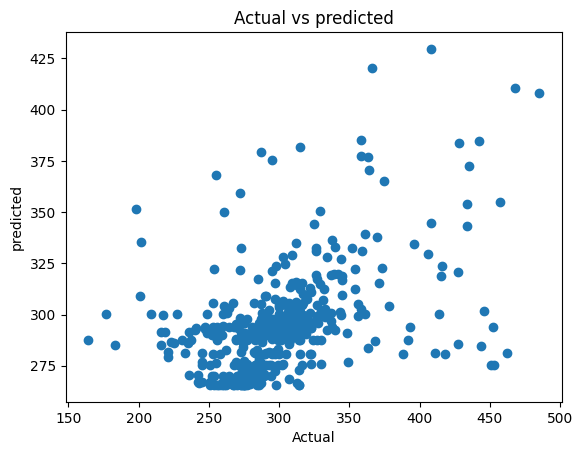

In [89]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model5.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [90]:
y_prd=np.squeeze(np.squeeze(model5.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

16/16 [==============================] - 0s 10ms/step


,Actual,predict,differences
443,287,296.130737,-9.130737
319,317,296.538025,20.461975
703,295,289.138458,5.861542
526,320,307.346344,12.653656
76,435,372.340424,62.659576
1542,231,287.485535,-56.485535
1261,249,291.174530,-42.174530
532,285,289.217407,-4.217407
1294,293,275.413269,17.586731
517,296,295.107422,0.892578
